In [1]:
import pandas as pd
import numpy as n
import matplotlib.pyplot as plt

In [2]:
data = pd.read_csv('/Users/i513088/Desktop/new_LicensesDaily.csv', sep = ';')
print(len(data))

AP = data[data['GLOBAL_01_CODE']=='AP']
AP.sort_values('SnapDate', inplace=True)
AP = AP.reset_index(drop=True)

data.head()
print(len(AP))
AP.head()

6044
455


/Users/i513088/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """


,SnapDate,CLOSING_QUARTER_ACTUAL,GLOBAL_01_CODE,ESTIMATED_IN,CurrentQuarter_Commit,CurrentQuarterProbable,CurrentQuarter_Upside,FutureQuarter_Commit,FutureQuarter_Probable,FutureQuarter_Upside,NonExistent,BUDGET,PREDICTION,OppScoresForecast,OpenPipe
0,2018-01-01,2018-Q1,AP,"1894,27601567","2834,829486","21594,688423","16919,32389",0,"895,590762","9000,442689","22916,1762660507","119769,4345","91698,0389663328",0,"384141,490917"
1,2018-01-02,2018-Q1,AP,"1895,14971876","2834,829486","21608,53063","16885,979404",0,"895,590762","8996,982357","22916,1762660507","119769,4345","91698,0389663328",0,"374290,271799"
2,2018-01-03,2018-Q1,AP,"1895,14971876","2984,575051","21406,86362","16981,555271",0,"1123,735505","8996,982357","22748,2536170262","107756,26998","91698,0389663328",0,"351231,920953"
3,2018-01-04,2018-Q1,AP,"1914,59689042","3007,309215","21364,666466","17286,461504",0,"1123,735505","9074,974372","21645,230336035","107756,26998","91698,0389663328",0,"329941,832508"
4,2018-01-05,2018-Q1,AP,"1895,74354582","3006,39373","21324,843809","17199,397281",0,"1153,529682","9056,463662","21664,083680635","107756,26998","91698,0389663328",0,"295113,14634"


In [3]:
for i in range(len(AP)):
    AP.loc[i]['CurrentQuarter_Commit'] = AP.loc[i]['CurrentQuarter_Commit'].replace(',', '.')
    AP.loc[i]['CurrentQuarterProbable'] = AP.loc[i]['CurrentQuarterProbable'].replace(',', '.')
    AP.loc[i]['CurrentQuarter_Upside'] = AP.loc[i]['CurrentQuarter_Upside'].replace(',', '.')
    AP.loc[i]['FutureQuarter_Commit'] = AP.loc[i]['FutureQuarter_Commit'].replace(',', '.')
    AP.loc[i]['FutureQuarter_Upside'] = AP.loc[i]['FutureQuarter_Upside'].replace(',', '.')
    AP.loc[i]['FutureQuarter_Probable'] = AP.loc[i]['FutureQuarter_Probable'].replace(',', '.')


    AP.loc[i]['ESTIMATED_IN'] = AP.loc[i]['ESTIMATED_IN'].replace(',', '.')
    AP.loc[i]['NonExistent'] = AP.loc[i]['NonExistent'].replace(',', '.')
    AP.loc[i]['BUDGET'] = AP.loc[i]['BUDGET'].replace(',', '.')
    AP.loc[i]['OpenPipe'] = AP.loc[i]['OpenPipe'].replace(',', '.')


AP['CurrentQuarter_Commit'] = AP['CurrentQuarter_Commit'].astype('float')
AP['CurrentQuarterProbable'] = AP['CurrentQuarterProbable'].astype('float')
AP['CurrentQuarter_Upside'] = AP['CurrentQuarter_Upside'].astype('float')
AP['CurrentQuarter_Commit'] = AP['CurrentQuarter_Commit'].astype('float')
AP['FutureQuarter_Upside'] = AP['FutureQuarter_Upside'].astype('float')
AP['FutureQuarter_Commit'] = AP['FutureQuarter_Commit'].astype('float')
AP['FutureQuarter_Probable'] = AP['FutureQuarter_Probable'].astype('float')


AP['ESTIMATED_IN'] = AP['ESTIMATED_IN'].astype('float64')
AP['NonExistent'] = AP['NonExistent'].astype('float64')
AP['BUDGET'] = AP['BUDGET'].astype('float64')
AP['OpenPipe'] = AP['OpenPipe'].astype('float64')

AP['SnapDate'] = pd.to_datetime(AP['SnapDate'], format = '%Y-%m-%d') 

In [4]:
AP.sort_values(['SnapDate','CLOSING_QUARTER_ACTUAL'], inplace=True)
AP.drop_duplicates(subset='SnapDate', keep='last', inplace=True)

In [6]:
AP.to_csv('/Users/i513088/Desktop/SUN_Pipeline_test/data_all/AP/AP_daily.csv', columns=['SnapDate','CLOSING_QUARTER_ACTUAL', 'GLOBAL_01_CODE', 'ESTIMATED_IN', 'CurrentQuarter_Commit', 'CurrentQuarterProbable', 'CurrentQuarter_Upside', 
            'FutureQuarter_Commit', 'FutureQuarter_Upside', 'NonExistent', 'BUDGET', 'PREDICTION', 'OppScoresForecast', 'OpenPipe'])

/Users/i513088/anaconda3/lib/python3.7/site-packages/pandas/plotting/_converter.py:129: FutureWarning: Using an implicitly registered datetime converter for a matplotlib plotting method. The converter was registered by pandas on import. Future versions of pandas will require you to explicitly register matplotlib converters.

To register the converters:
	>>> from pandas.plotting import register_matplotlib_converters
	>>> register_matplotlib_converters()
  warnings.warn(msg, FutureWarning)


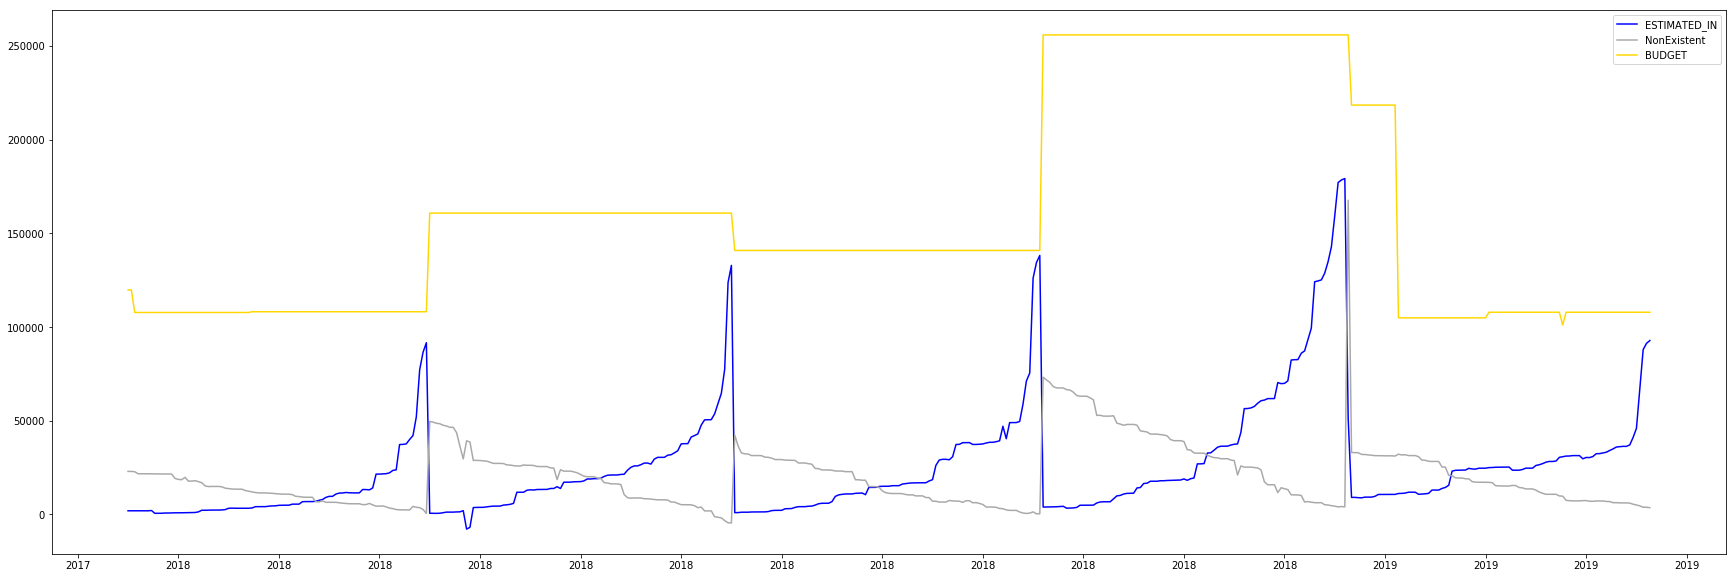

In [7]:
import matplotlib.ticker as ticker

fig, ax = plt.subplots(figsize=(30, 10))

date = AP['SnapDate'] #[200:500]

blue = AP['ESTIMATED_IN']
grey = AP['NonExistent']
gold = AP['BUDGET']
#red = MEE['Future'][1000:1500]
#green = MEE['Current'][1000:1500]

#plt.plot(range(len(red)),red,color='red',label='Future')
#plt.plot(range(len(green)),green,color='green',label='Current')

plt.plot(date,blue,color='blue',label='ESTIMATED_IN')
plt.plot(date,grey,color='darkgrey',label='NonExistent')
plt.plot(date,gold,color='gold',label='BUDGET')
#plt.plot(date,violet,color='violet',label='fc6_ESTIMATED_IN_2018')


#plt.plot(range(len(violet)),violet,color='violet',label='fc6_ESTIMATED_IN_2018')


tick_spacing = 30
ax.xaxis.set_major_locator(ticker.MultipleLocator(tick_spacing))

plt.legend()

In [8]:
AP['CURRENT'] = None; AP['FUTURE'] = None; AP['GreyRed'] = None
AP['FUTURE'] = AP['FutureQuarter_Commit'] + AP['FutureQuarter_Upside'] + AP['FutureQuarter_Probable']
AP['CURRENT'] = AP['CurrentQuarter_Commit'] + AP['CurrentQuarterProbable'] + AP['CurrentQuarter_Upside']
AP['GreyRed'] = AP['NonExistent'] + AP['FUTURE']


In [9]:
AP_daily = AP[['SnapDate', 'CLOSING_QUARTER_ACTUAL', 'GLOBAL_01_CODE', 'CURRENT', 'ESTIMATED_IN', 'NonExistent', 'FUTURE', 'GreyRed', 'BUDGET', 'OpenPipe']]

In [10]:
AP_daily.head()

,SnapDate,CLOSING_QUARTER_ACTUAL,GLOBAL_01_CODE,CURRENT,ESTIMATED_IN,NonExistent,FUTURE,GreyRed,BUDGET,OpenPipe
0,2018-01-01,2018-Q1,AP,41348.841799,1894.276016,22916.176266,9896.033451,32812.209717,119769.43450,384141.490917
1,2018-01-02,2018-Q1,AP,41329.339520,1895.149719,22916.176266,9892.573119,32808.749385,119769.43450,374290.271799
2,2018-01-03,2018-Q1,AP,41372.993942,1895.149719,22748.253617,10120.717862,32868.971479,107756.26998,351231.920953
3,2018-01-04,2018-Q1,AP,41658.437185,1914.596890,21645.230336,10198.709877,31843.940213,107756.26998,329941.832508
4,2018-01-05,2018-Q1,AP,41530.634820,1895.743546,21664.083681,10209.993344,31874.077025,107756.26998,295113.146340


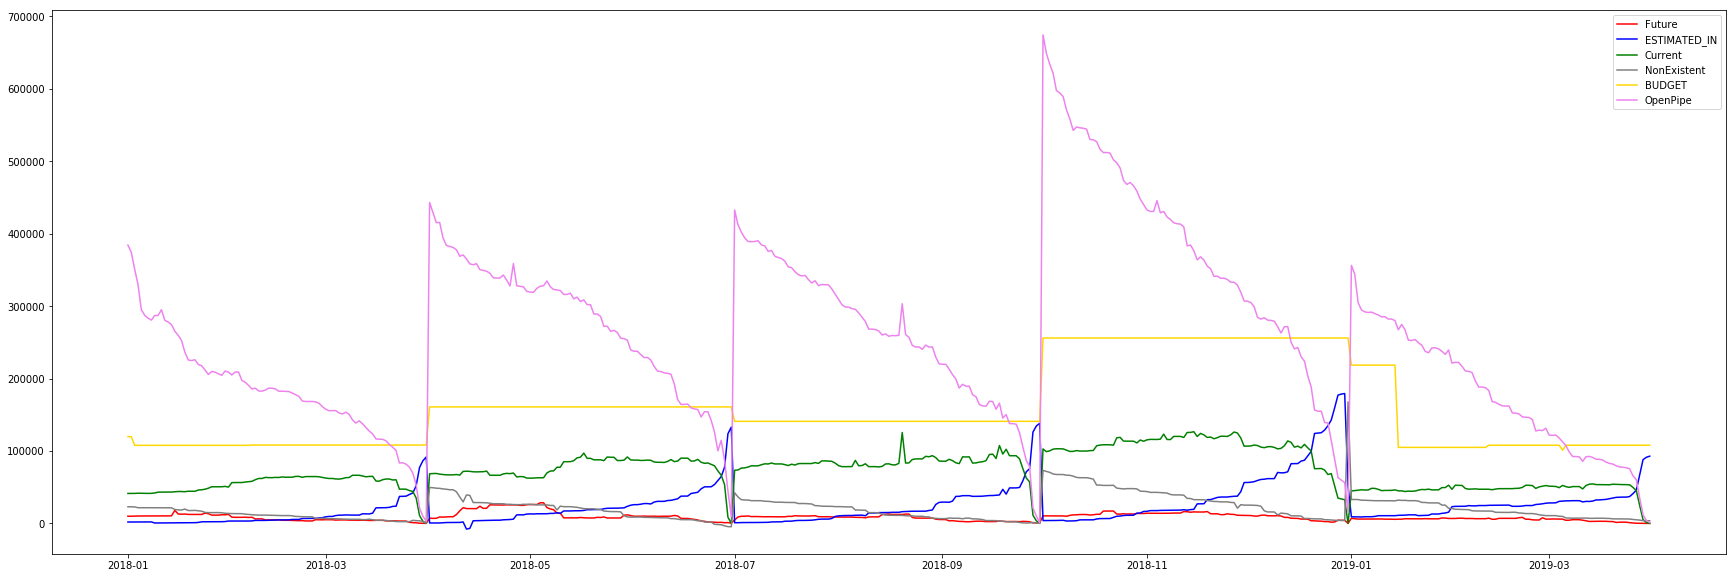

In [11]:
fig, ax = plt.subplots(figsize=(30, 10))

date = AP_daily['SnapDate']

blue = AP_daily['ESTIMATED_IN']
grey = AP_daily['NonExistent']
gold = AP_daily['BUDGET']
red = AP_daily['FUTURE']
green = AP_daily['CURRENT']
violet = AP_daily['OpenPipe']

plt.plot(date,red,color='red',label='Future')
plt.plot(date,blue,color='blue',label='ESTIMATED_IN')
plt.plot(date,green,color='green',label='Current')
plt.plot(date,grey,color='grey',label='NonExistent')
plt.plot(date,gold,color='gold',label='BUDGET')
plt.plot(date,violet,color='violet',label='OpenPipe')

tick_spacing = 30

plt.legend()

## <font color = red>Correlation analysis</font>

In [12]:
AP_daily.corr()

,CURRENT,ESTIMATED_IN,NonExistent,FUTURE,GreyRed,BUDGET,OpenPipe
CURRENT,1.000000,-0.113850,0.296543,0.339635,0.344161,0.670304,0.596819
ESTIMATED_IN,-0.113850,1.000000,-0.407697,-0.415912,-0.459117,0.275965,-0.506212
NonExistent,0.296543,-0.407697,1.000000,0.450560,0.969335,0.524526,0.806259
FUTURE,0.339635,-0.415912,0.450560,1.000000,0.656128,0.318275,0.638920
GreyRed,0.344161,-0.459117,0.969335,0.656128,1.000000,0.530998,0.857413
BUDGET,0.670304,0.275965,0.524526,0.318275,0.530998,1.000000,0.578222
OpenPipe,0.596819,-0.506212,0.806259,0.638920,0.857413,0.578222,1.000000


## <font color = red>Case1. At first I will try to see the following relation between GreyRed and Blue: GreyRed_now = Blue_g-1 * GreyRed_g-1 / Blue_now</font>

### We want to use the data in same day of prior quarter, so at first we have to extract and reorder the data of different years and quarters by same weeks.

#### AP_ESTIMATED_IN1

In [13]:
AP_ESTIMATED_IN1 = pd.DataFrame(index=range(92), columns=['2018-Q1', '2018-Q2', '2018-Q3', '2018-Q4','2019-Q1'])

for i in AP_ESTIMATED_IN1.columns:
    #print(i)
    for j in range(len(AP_daily[AP_daily['CLOSING_QUARTER_ACTUAL']==i])):
        #print(j)
        AP_ESTIMATED_IN1[i].iloc[j] = AP_daily[AP_daily['CLOSING_QUARTER_ACTUAL']==i]['ESTIMATED_IN'].iloc[j]


In [14]:
AP_ESTIMATED_IN2 = pd.DataFrame(index=range(92), columns=['2018-Q1', '2018-Q2', '2018-Q3', '2018-Q4','2019-Q1']).reset_index(drop=True)

AP_ESTIMATED_IN2['2018-Q1'] = [AP_ESTIMATED_IN1.loc[0]['2018-Q1'], AP_ESTIMATED_IN1.loc[0]['2018-Q1']] + list(AP_ESTIMATED_IN1[:90]['2018-Q1'].reset_index(drop=True))
AP_ESTIMATED_IN2['2018-Q2'] = [AP_ESTIMATED_IN1.loc[0]['2018-Q2']] + list(AP_ESTIMATED_IN1[:91]['2018-Q2'].reset_index(drop=True))
AP_ESTIMATED_IN2['2018-Q3'] = list(AP_ESTIMATED_IN1['2018-Q3'].reset_index(drop=True))
AP_ESTIMATED_IN2['2018-Q4'] = list(AP_ESTIMATED_IN1['2018-Q4'].reset_index(drop=True))
AP_ESTIMATED_IN2['2019-Q1'] = [AP_ESTIMATED_IN1.loc[0]['2019-Q1'], AP_ESTIMATED_IN1.loc[0]['2019-Q1']] + list(AP_ESTIMATED_IN1[:90]['2019-Q1'].reset_index(drop=True))

#### AP_GreyRed

In [15]:
AP_GreyRed = pd.DataFrame(index=range(92), columns=['2018-Q1', '2018-Q2', '2018-Q3', '2018-Q4','2019-Q1'])

for i in AP_GreyRed.columns:
    #print(i)
    for j in range(len(AP_daily[AP_daily['CLOSING_QUARTER_ACTUAL']==i])):
        #print(j)
        AP_GreyRed[i].iloc[j] = AP_daily[AP_daily['CLOSING_QUARTER_ACTUAL']==i]['GreyRed'].iloc[j]
        
    
AP_GreyRed['2018-Q1'] = [AP_GreyRed.loc[0]['2018-Q1'], AP_GreyRed.loc[0]['2018-Q1']] + list(AP_GreyRed[:90]['2018-Q1'].reset_index(drop=True))
AP_GreyRed['2018-Q2'] = [AP_GreyRed.loc[0]['2018-Q2']] + list(AP_GreyRed[:91]['2018-Q2'].reset_index(drop=True))
AP_GreyRed['2018-Q3'] = list(AP_GreyRed['2018-Q3'].reset_index(drop=True))
AP_GreyRed['2018-Q4'] = list(AP_GreyRed['2018-Q4'].reset_index(drop=True))
AP_GreyRed['2019-Q1'] = [AP_GreyRed.loc[0]['2019-Q1'], AP_GreyRed.loc[0]['2019-Q1']] + list(AP_GreyRed[:90]['2019-Q1'].reset_index(drop=True))

#### AP_BUDGET

In [16]:
AP_BUDGET = pd.DataFrame(index=range(92), columns=['2018-Q1', '2018-Q2', '2018-Q3', '2018-Q4','2019-Q1'])

for i in AP_BUDGET.columns:
    #print(i)
    for j in range(len(AP_daily[AP_daily['CLOSING_QUARTER_ACTUAL']==i])):
        #print(j)
        AP_BUDGET[i].iloc[j] = AP_daily[AP_daily['CLOSING_QUARTER_ACTUAL']==i]['BUDGET'].iloc[j]
        
    
AP_BUDGET['2018-Q1'] = [AP_BUDGET.loc[0]['2018-Q1'], AP_BUDGET.loc[0]['2018-Q1']] + list(AP_BUDGET[:90]['2018-Q1'].reset_index(drop=True))
AP_BUDGET['2018-Q2'] = [AP_BUDGET.loc[0]['2018-Q2']] + list(AP_BUDGET[:91]['2018-Q2'].reset_index(drop=True))
AP_BUDGET['2018-Q3'] = list(AP_BUDGET['2018-Q3'].reset_index(drop=True))
AP_BUDGET['2018-Q4'] = list(AP_BUDGET['2018-Q4'].reset_index(drop=True))
AP_BUDGET['2019-Q1'] = [AP_BUDGET.loc[0]['2019-Q1'], AP_BUDGET.loc[0]['2019-Q1']] + list(AP_BUDGET[:90]['2019-Q1'].reset_index(drop=True))

#### AP_OpenPipe

In [17]:
AP_OpenPipe = pd.DataFrame(index=range(92), columns=['2018-Q1', '2018-Q2', '2018-Q3', '2018-Q4','2019-Q1'])

for i in AP_OpenPipe.columns:
    #print(i)
    for j in range(len(AP_daily[AP_daily['CLOSING_QUARTER_ACTUAL']==i])):
        #print(j)
        AP_OpenPipe[i].iloc[j] = AP_daily[AP_daily['CLOSING_QUARTER_ACTUAL']==i]['OpenPipe'].iloc[j]
        
 
AP_OpenPipe['2018-Q1'] = [AP_OpenPipe.loc[0]['2018-Q1'], AP_OpenPipe.loc[0]['2018-Q1']] + list(AP_OpenPipe[:90]['2018-Q1'].reset_index(drop=True))
AP_OpenPipe['2018-Q2'] = [AP_OpenPipe.loc[0]['2018-Q2']] + list(AP_OpenPipe[:91]['2018-Q2'].reset_index(drop=True))
AP_OpenPipe['2018-Q3'] = list(AP_OpenPipe['2018-Q3'].reset_index(drop=True))
AP_OpenPipe['2018-Q4'] = list(AP_OpenPipe['2018-Q4'].reset_index(drop=True))
AP_OpenPipe['2019-Q1'] = [AP_OpenPipe.loc[0]['2019-Q1'], AP_OpenPipe.loc[0]['2019-Q1']] + list(AP_OpenPipe[:90]['2019-Q1'].reset_index(drop=True))


### Following, we want to get two new variables <font color=red>AP_GreyRed_FC1 and AP_GreyRed_FC2, fc7_OpenPipe and fc8_OpenPipe.</font>

In [18]:
AP_GreyRed_FC1 = pd.DataFrame(index=range(92), columns=['2018-Q1', '2018-Q2', '2018-Q3', '2018-Q4','2019-Q1'])

for i in range(92):
    for j in range(1,5):
        AP_GreyRed_FC1.iloc[i][j] = AP_ESTIMATED_IN2.iloc[i][j] * AP_GreyRed.iloc[i][j-1] / AP_ESTIMATED_IN2.iloc[i][j-1]
        
AP_GreyRed_FC1['2018-Q1'] = AP_GreyRed['2018-Q1']

In [19]:
AP_GreyRed_FC2 = pd.DataFrame(index=range(92), columns=['2018-Q1', '2018-Q2', '2018-Q3', '2018-Q4','2019-Q1'])

for i in range(92):
    for j in range(1,5):
        AP_GreyRed_FC2.iloc[i][j] = AP_BUDGET.iloc[i][j] * AP_GreyRed.iloc[i][j-1] / AP_BUDGET.iloc[i][j-1]
        
AP_GreyRed_FC2['2018-Q1'] = AP_GreyRed['2018-Q1']

In [20]:
AP_OpenPipe_FC = pd.DataFrame(index=range(92), columns=['2018-Q1', '2018-Q2', '2018-Q3', '2018-Q4','2019-Q1'])

for i in range(91):
    for j in range(5):
        AP_OpenPipe_FC.iloc[i+1][j] = AP_OpenPipe.iloc[i+1][j] - AP_OpenPipe.iloc[i][j]
        
AP_OpenPipe_FC[AP_OpenPipe_FC.isnull()==True] = 0

### Now, we want to compare the value of two new variables MEE_GreyRed_FC1 and MEE_GreyRed_FC2 with the true MEE_GreyRed value.

In [21]:
true_GreyRed = pd.concat([AP_GreyRed['2018-Q1'], AP_GreyRed['2018-Q2'], AP_GreyRed['2018-Q3'], AP_GreyRed['2018-Q4'], AP_GreyRed['2019-Q1']]).reset_index(drop=True)

fc1_GreyRed = pd.concat([AP_GreyRed_FC1['2018-Q1'], AP_GreyRed_FC1['2018-Q2'], AP_GreyRed_FC1['2018-Q3'], AP_GreyRed_FC1['2018-Q4'], AP_GreyRed_FC1['2019-Q1']]).reset_index(drop=True)

fc2_GreyRed = pd.concat([AP_GreyRed_FC2['2018-Q1'], AP_GreyRed_FC2['2018-Q2'], AP_GreyRed_FC2['2018-Q3'], AP_GreyRed_FC2['2018-Q4'], AP_GreyRed_FC2['2019-Q1']]).reset_index(drop=True)

fc7_OpenPipe = pd.concat([AP_OpenPipe['2018-Q1'], AP_OpenPipe['2018-Q2'], AP_OpenPipe['2018-Q3'], AP_OpenPipe['2018-Q4'], AP_OpenPipe['2019-Q1']]).reset_index(drop=True)

fc8_OpenPipe = pd.concat([AP_OpenPipe_FC['2018-Q1'], AP_OpenPipe_FC['2018-Q2'], AP_OpenPipe_FC['2018-Q3'], AP_OpenPipe_FC['2018-Q4'], AP_OpenPipe_FC['2019-Q1']]).reset_index(drop=True)

In [22]:
len(true_GreyRed)
#len(fc1_GreyRed)
len(fc7_OpenPipe)

460

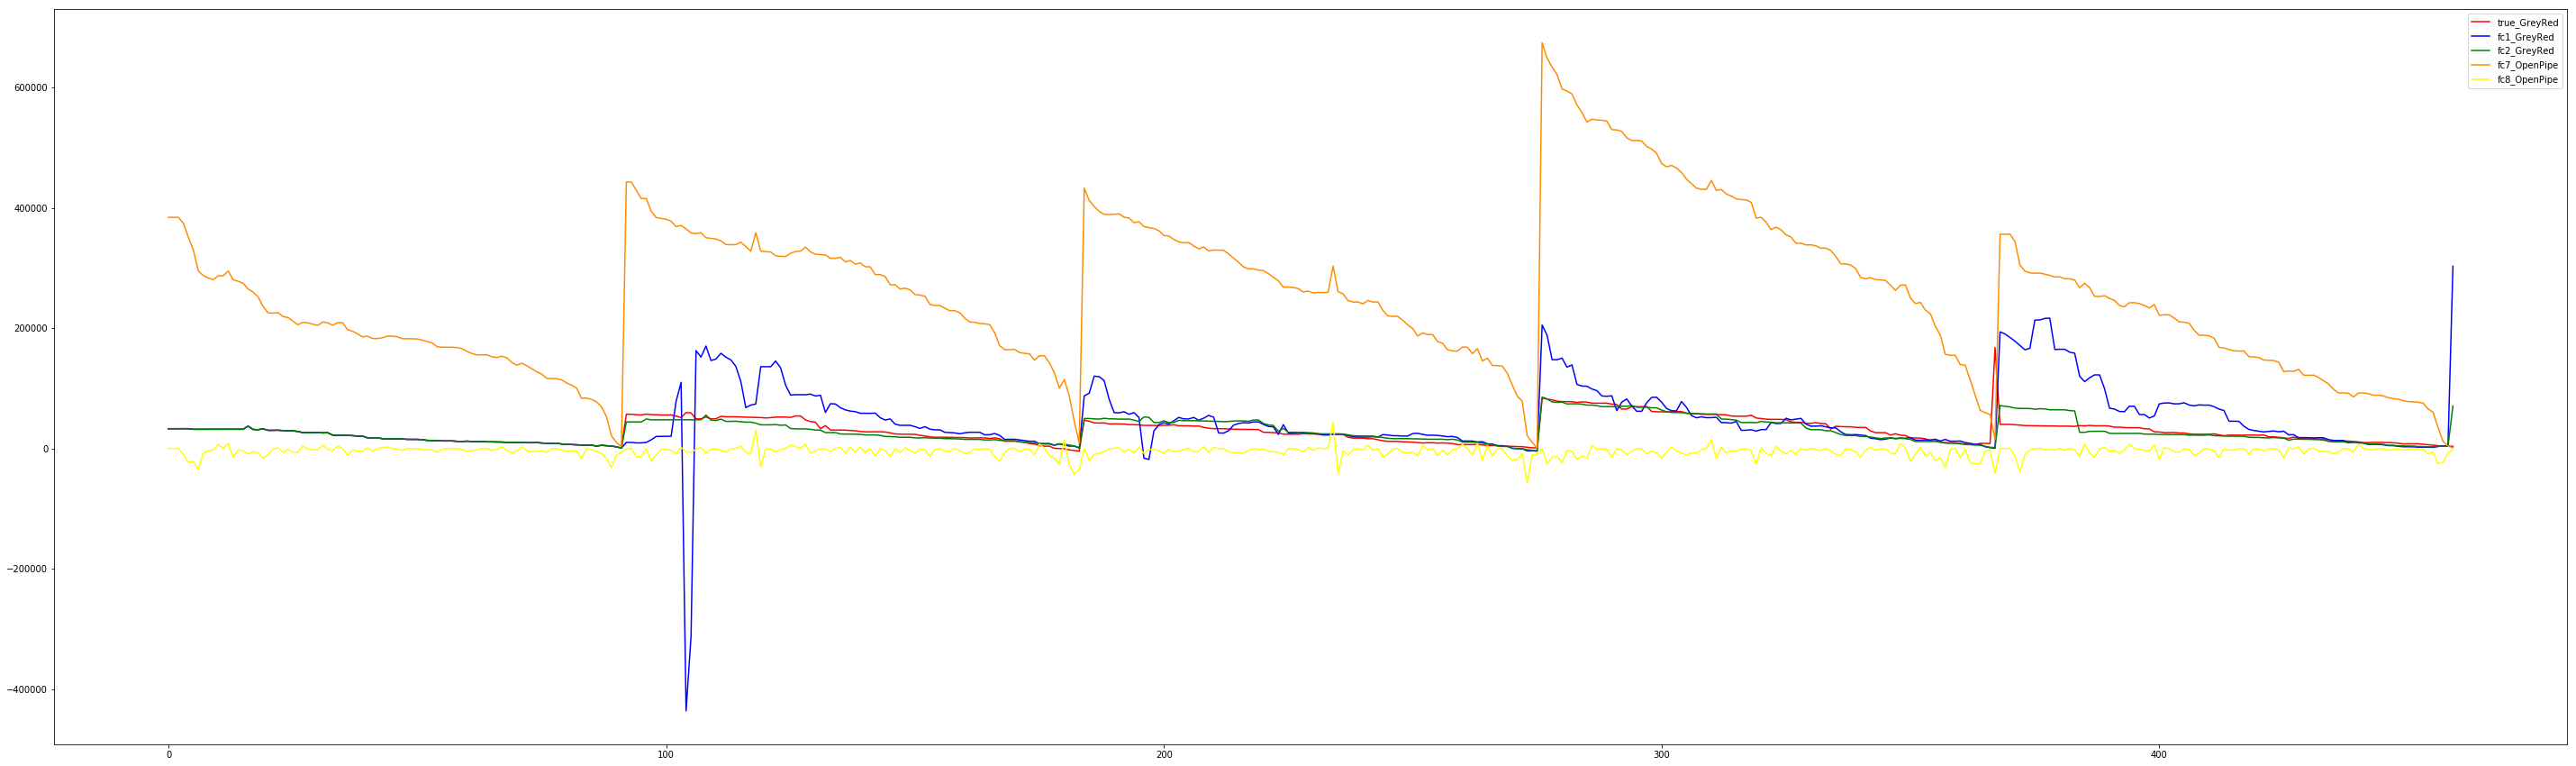

In [23]:
fig, ax = plt.subplots(figsize=(50, 15))

red = true_GreyRed
blue = fc1_GreyRed
green = fc2_GreyRed
orange = fc7_OpenPipe
yellow = fc8_OpenPipe


plt.plot(range(len(red)),red,color='red',label='true_GreyRed')
plt.plot(range(len(blue)),blue,color='blue',label='fc1_GreyRed')
plt.plot(range(len(green)),green,color='green',label='fc2_GreyRed')
plt.plot(range(len(orange)),orange,color='darkorange',label='fc7_OpenPipe')
plt.plot(range(len(yellow)),yellow,color='yellow',label='fc8_OpenPipe')


plt.legend()
plt.show()

### Now, we want to use the two new variables AP_GreyRed_FC1 and AP_GreyRed_FC2 to build regression models.

In [24]:
def MAPE(y_true, y_pred): 
    y_true, y_pred = np.array(y_true), np.array(y_pred)
    return (np.abs((y_true - y_pred) / y_true)) * 100

In [25]:
import numpy as np
from sklearn.model_selection import cross_val_predict
from sklearn.model_selection import cross_val_score
from sklearn.metrics import mean_absolute_error

###########1.data preparation part##########
def load_data():

    '''
    x1_train = np.linspace(0,50,500)
    x2_train = np.linspace(-10,10,500)
    data_train = np.array([[x1,x2,f(x1,x2) + (np.random.random(1)-0.5)] for x1,x2 in zip(x1_train, x2_train)])
    
    x1_test = np.linspace(0,50,100)+ 0.5 * np.random.random(100)
    x2_test = np.linspace(-10,10,100) + 0.02 * np.random.random(100)
    data_test = np.array([[x1,x2,f(x1,x2)] for x1,x2 in zip(x1_test, x2_test)])
    '''
    #x1_train = fc1_GreyRed[:368]
    x2_train = fc2_GreyRed[:368]
    x3_train = fc7_OpenPipe[:368]
    x4_train = fc8_OpenPipe[:368]
    
    #x1_test = fc1_GreyRed[368:]
    x2_test = fc2_GreyRed[368:]
    x3_test = fc7_OpenPipe[368:]
    x4_test = fc8_OpenPipe[368:]
    
    y_train = true_GreyRed[:368]
    y_test = true_GreyRed[368:]
    
    data_train = np.array([[x1,x2,x3,y] for x1,x2,x3,y in zip(x2_train, x3_train, x4_train, y_train)])
    data_test = np.array([[x1,x2,x3,y] for x1,x2,x3,y in zip(x2_test, x3_test, x4_test, y_test)])

    
    return data_train, data_test


train, test = load_data()
x_train, y_train = train[:,:3], train[:,3] #数据前两列是x1,x2 第三列是y,这里的y有随机噪声
x_test, y_test = test[:,:3], test[:,3] #数据前两列是x1,x2 第三列是y,这里的y有随机噪声



s_train: 1.0
score_train: 0.0
MAPE_train is:  0.0 %
s_test: 0.2111525810980579
score_test: 7617.650655672869
MAPE_test is:  40.756465686726585 %


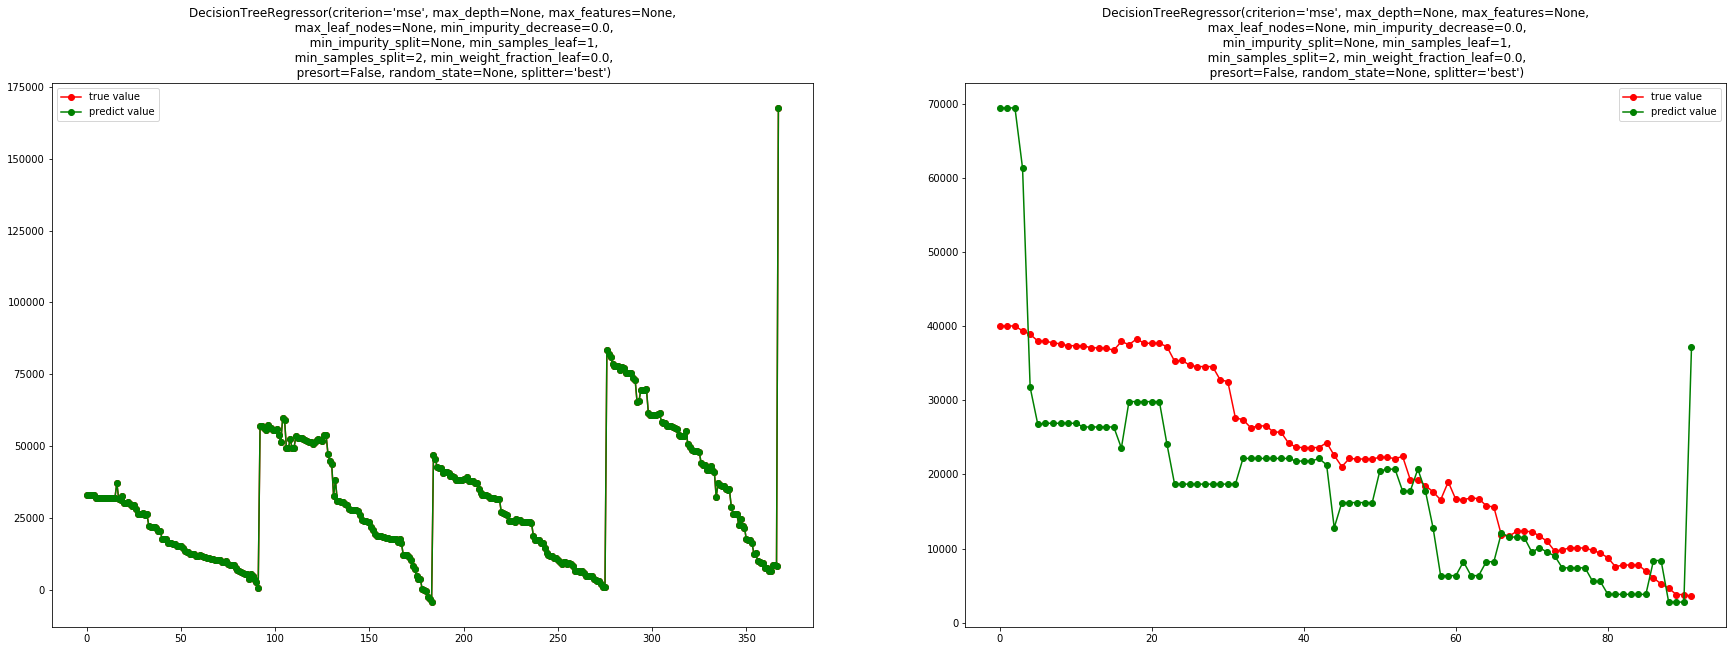

s_train: 0.7709877609545306
score_train: 4770.785768735281
MAPE_train is:  54.82023833946028 %
s_test: 0.3674239269676284
score_test: 7323.8433741759545
MAPE_test is:  42.82442973742177 %


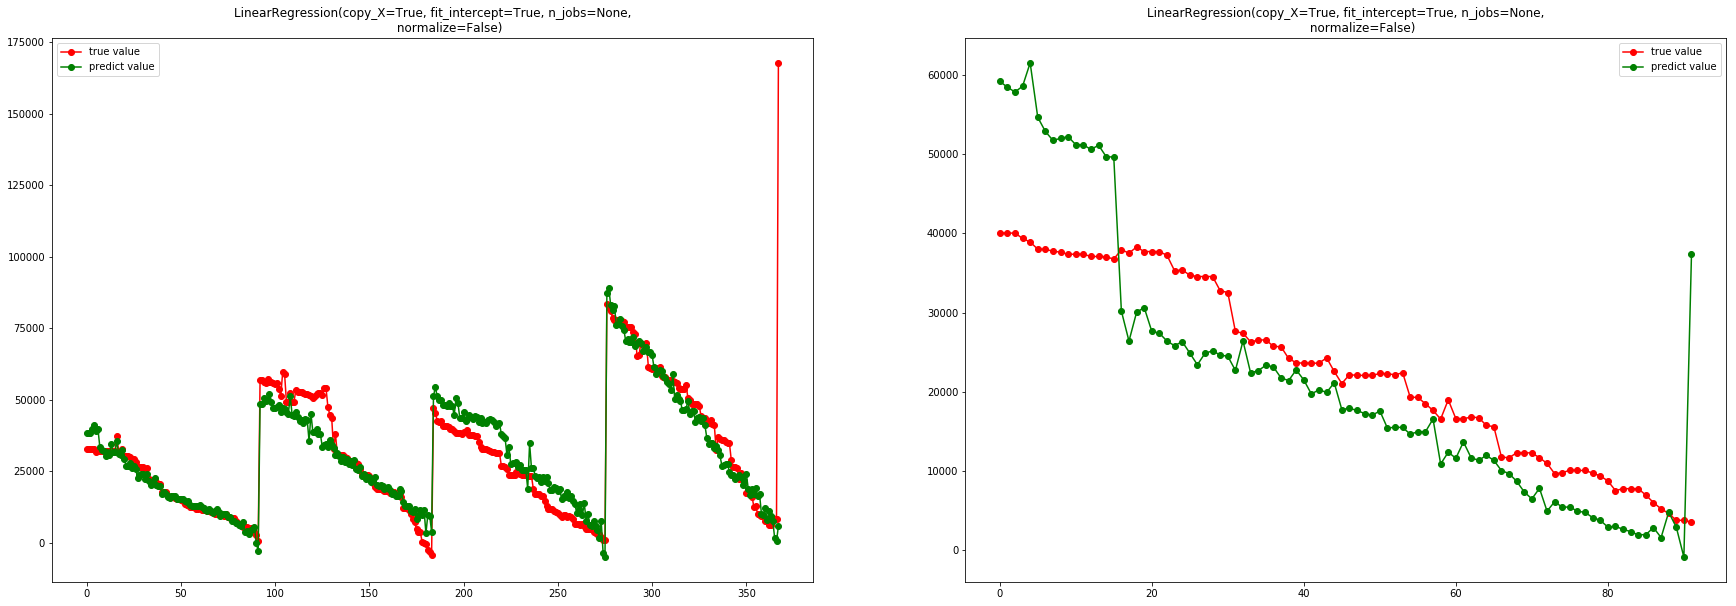

s_train: 0.8403949337935808
score_train: 3202.8454626384546
MAPE_train is:  35.900322860744836 %
s_test: 0.2437198799563152
score_test: 8429.03730022975
MAPE_test is:  52.36382976105562 %


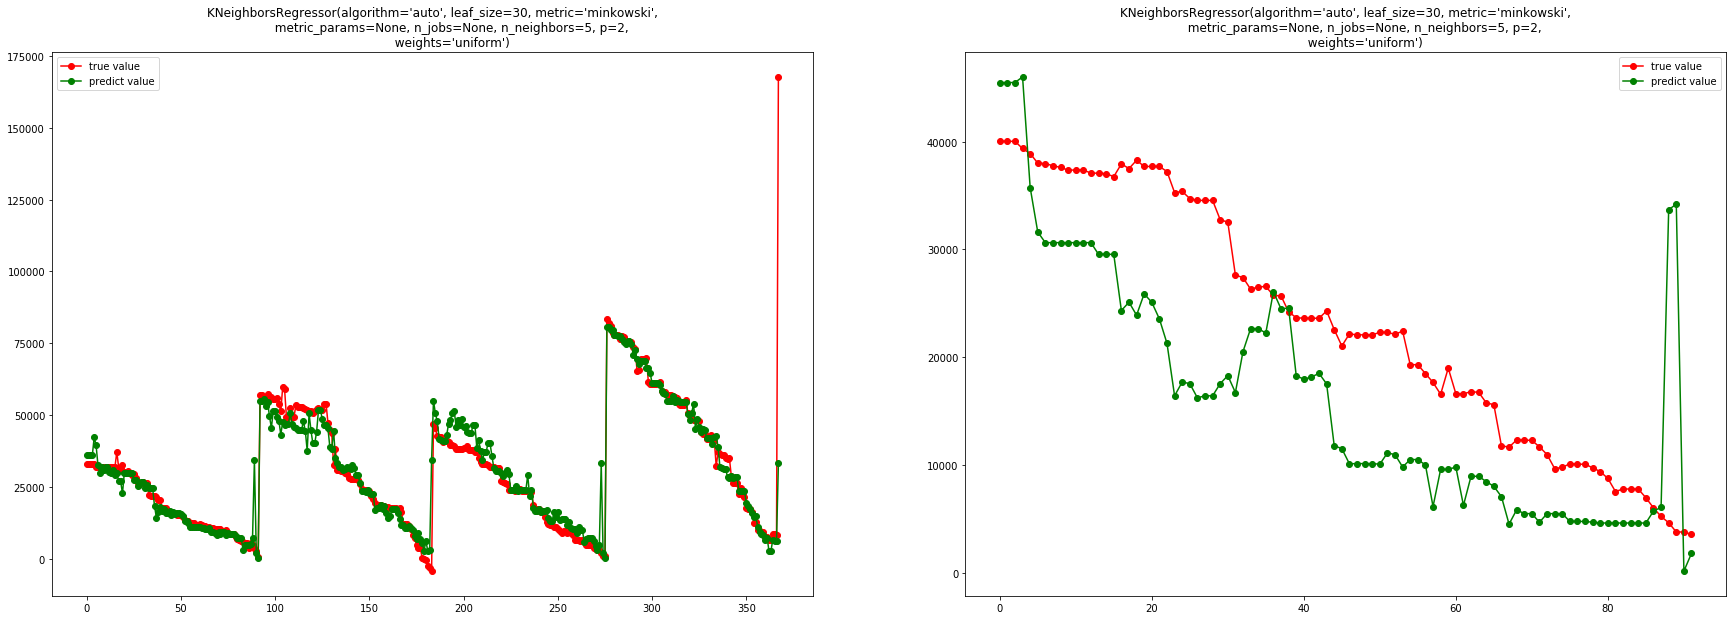

s_train: 0.9675509653372754
score_train: 1283.422113540701
MAPE_train is:  27.295026577496703 %
s_test: 0.5218041366401494
score_test: 6272.622856135521
MAPE_test is:  38.62966372587426 %


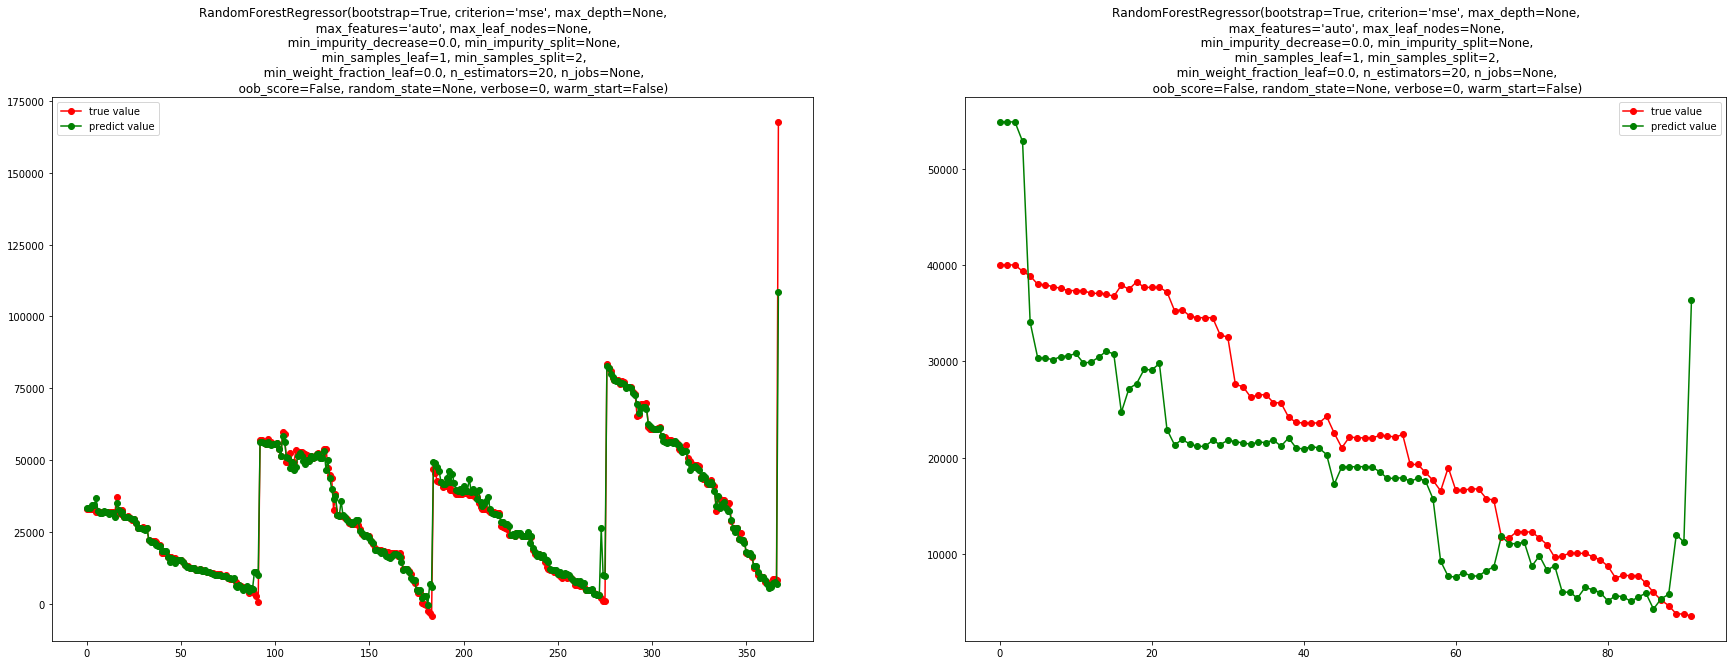

s_train: 0.7709877609545306
score_train: 4770.785758868918
MAPE_train is:  54.82023811763951 %
s_test: 0.3674239295056071
score_test: 7323.84335488048
MAPE_test is:  42.8244296122984 %


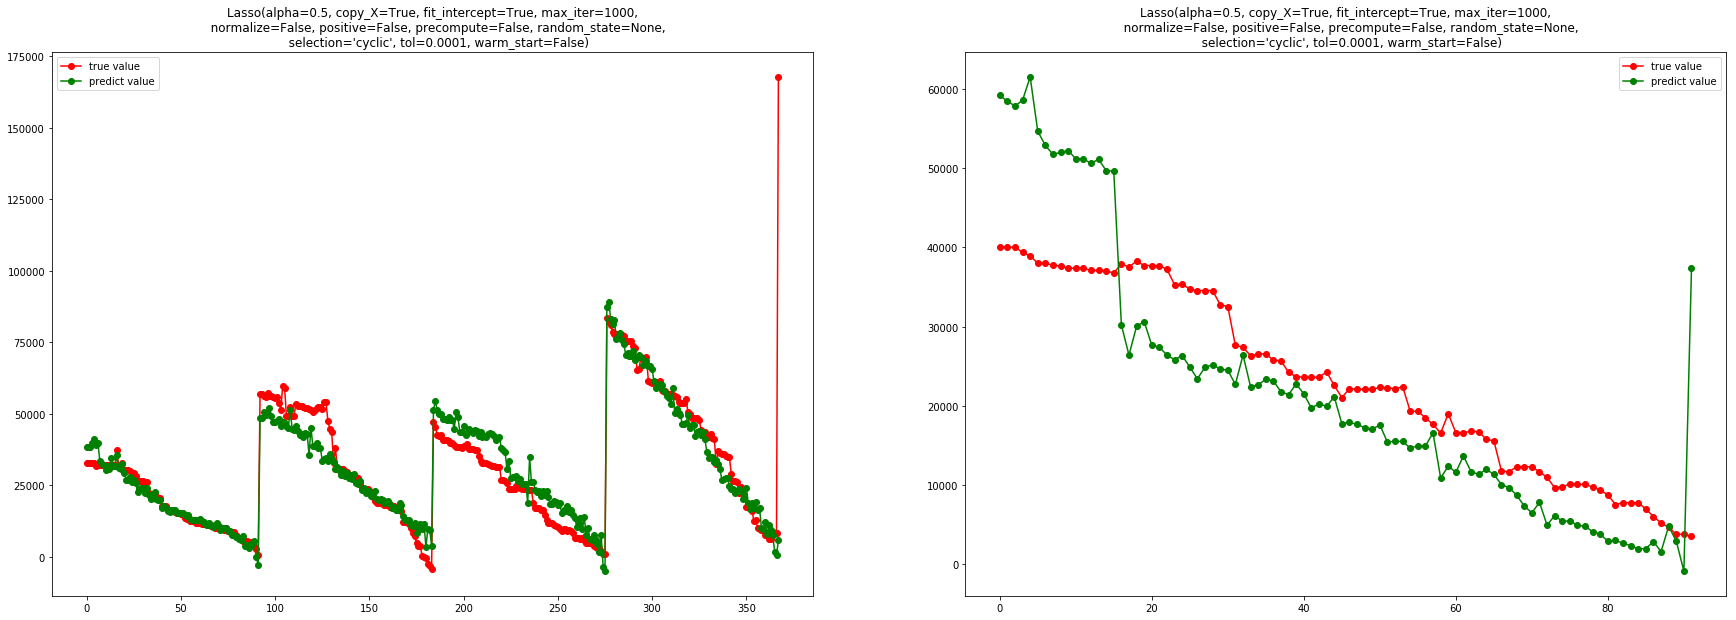

s_train: 0.8044787627216385
score_train: 4698.635428531355
MAPE_train is:  59.30163896117339 %
s_test: 0.5175052511515212
score_test: 6190.353775153139
MAPE_test is:  45.65247460710666 %


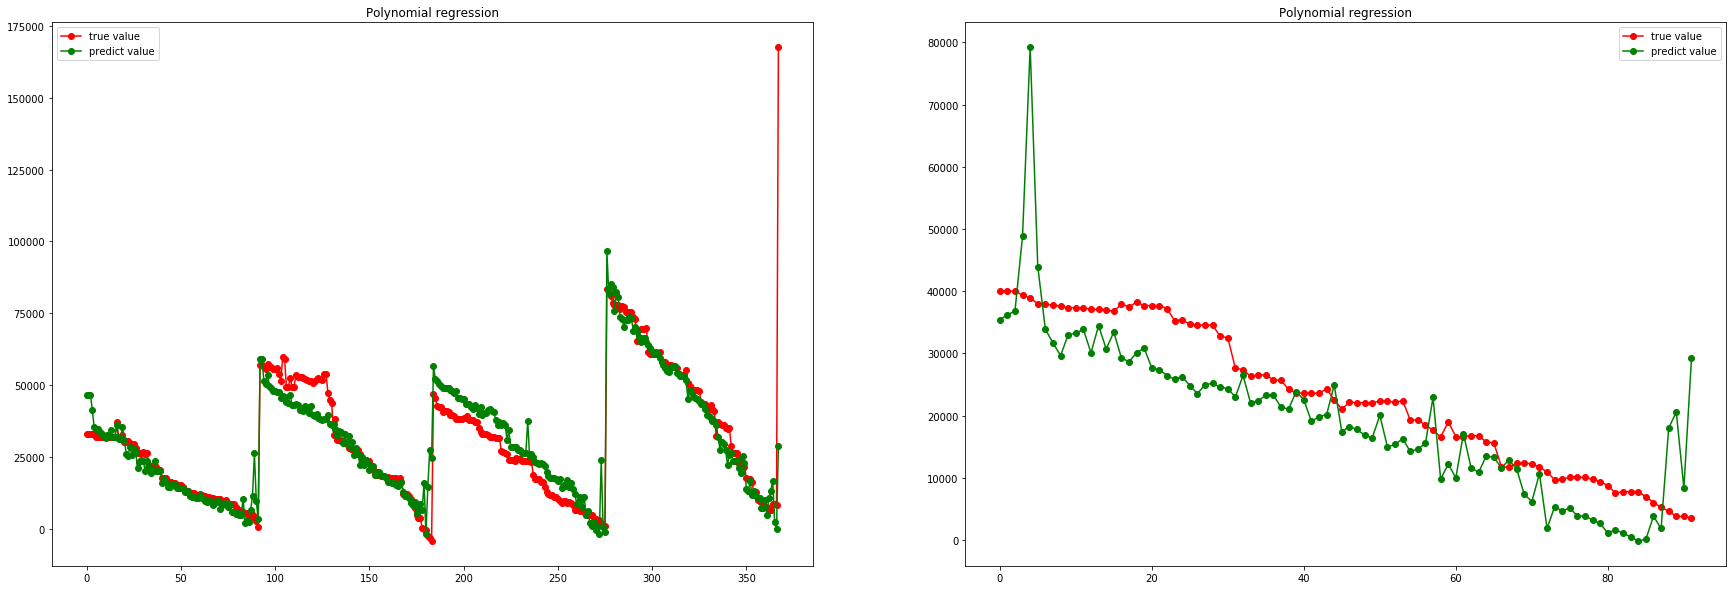

In [26]:
###########3.chosen regression model##########
####3.1 Decision Tree regression ####
from sklearn import tree
model_DecisionTreeRegressor = tree.DecisionTreeRegressor()

####3.2 Linear regression ####
from sklearn import linear_model
model_LinearRegression = linear_model.LinearRegression()

####3.3 SVM regression ####
from sklearn import svm
model_SVR = svm.SVR()

####3.4 KNN regression ####
from sklearn import neighbors
model_KNeighborsRegressor = neighbors.KNeighborsRegressor()

####3.5 Random forest regression ####
from sklearn import ensemble
model_RandomForestRegressor = ensemble.RandomForestRegressor(n_estimators=20)#这里使用20个决策树

####3.6 Adaboost regression ####
from sklearn import ensemble
model_AdaBoostRegressor = ensemble.AdaBoostRegressor(n_estimators=50)#这里使用50个决策树

####3.7 GBRT regression ####
from sklearn import ensemble
model_GradientBoostingRegressor = ensemble.GradientBoostingRegressor(n_estimators=100)#这里使用100个决策树

####3.8 Bagging regression ####
from sklearn.ensemble import BaggingRegressor
model_BaggingRegressor = BaggingRegressor()

####3.9 ExtraTree regression  ####
from sklearn.tree import ExtraTreeRegressor
model_ExtraTreeRegressor = ExtraTreeRegressor()

####3.10 Ridge regression  ####
from sklearn.linear_model import Ridge
model_Ridge = Ridge()

####3.11 Lasso regression ####
from sklearn import linear_model
model_lasso = linear_model.Lasso(alpha=0.5)


####3.12 Polynomial regression ####   
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression

def polyreg():

    poly = PolynomialFeatures(degree=2)

    poly.fit(x_train)
    x_polytrain = poly.transform(x_train)
    poly.fit(x_test)
    x_polytest = poly.transform(x_test) 

    lin_reg2 = LinearRegression()

    '''
    predicted = cross_val_predict(lin_reg2, x_poly, y_train, cv=7)

    scores_train = cross_val_score(lin_reg2, x_poly, y_train, cv=7, scoring='neg_mean_absolute_error').mean()
    print('train_neg_mean_absolute_error: ', scores_train)

    scores_pred = mean_absolute_error(y_train, predicted)
    print('pred_mean_absolute_error: ', scores_pred)

    plt.figure(figsize=(15,7))
    plt.plot(np.arange(len(predicted)), y_train,'go-',label='true value')
    plt.plot(np.arange(len(predicted)),predicted,'ro-',label='predict value')
    plt.title('Polynomial Regression')
    plt.legend()
    plt.show()
    '''
    
    #model = lin_reg2
    lin_reg2.fit(x_polytrain,y_train)
    
    predicted_train = lin_reg2.predict(x_polytrain)
    score_train = mean_absolute_error(predicted_train, y_train)
    s_train = lin_reg2.score(x_polytrain, y_train)
    mape_train = np.mean(MAPE(y_train, predicted_train))
    
    predicted_test = lin_reg2.predict(x_polytest)
    score_test = mean_absolute_error(predicted_test, y_test)
    s_test = lin_reg2.score(x_polytest, y_test)
    mape_test = np.mean(MAPE(y_test, predicted_test))
    
    print('s_train:',s_train)
    print('score_train:',score_train)
    print('MAPE_train is: ', mape_train,'%')
    
    print('s_test:',s_test)
    print('score_test:',score_test)
    print('MAPE_test is: ', mape_test,'%')
    
    
    '''
    mape=MAPE(y_test, predicted_test)
    result_tab = pd.DataFrame(columns=['Region', 'Quarter', 'Week', 'MAPE'])
    for i in range(92):
        result_tab.loc[i] = ['MEE', '2019-Q1', i+1, mape[i]]
    print('The result tab of model: ', str('Polynomial regression'))
    print(result_tab)
    '''
    
    plt.figure(figsize=(30,10))
    
    plt.subplot(1,2,1)
    plt.plot(np.arange(len(predicted_train)), y_train,'ro-',label='true value')
    plt.plot(np.arange(len(predicted_train)),predicted_train,'go-',label='predict value')
    plt.title('Polynomial regression')


    plt.legend()
    
    plt.subplot(1,2,2)
    plt.plot(np.arange(len(predicted_test)), y_test,'ro-',label='true value')
    plt.plot(np.arange(len(predicted_test)), predicted_test,'go-',label='predict value')
    plt.title('Polynomial regression')
    plt.legend()
    
    plt.legend()
    plt.show()
    

    

    
###########2.regression part##########
from sklearn.metrics import mean_absolute_error

def try_different_method(model):
    '''    
    model.fit(x_train,y_train)
    #score = model.score(x_test, y_test)
    result = model.predict(x_train)
    plt.figure()
    plt.plot(np.arange(len(result)), y_train,'go-',label='true value')
    plt.plot(np.arange(len(result)),result,'ro-',label='predict value')
    plt.title(str(model))
    plt.legend()
    plt.show()
    '''
    
    #model.fit(x_train,y_train)
    #score = model.score(x_test, y_test)
    #result = model.predict(x_test)
    '''
    predicted = cross_val_predict(model, x_train, y_train, cv=6)

    scores_train = cross_val_score(model, x_train, y_train, cv=6, scoring='neg_mean_absolute_error').mean()
    print('train_neg_mean_absolute_error: ', scores_train)
    scores_pred = mean_absolute_error(y_train, predicted)
    print('pred_mean_absolute_error: ', scores_pred)
    '''
    
    model.fit(x_train,y_train)
    
    predicted_train = model.predict(x_train)
    score_train = mean_absolute_error(predicted_train, y_train)
    s_train = model.score(x_train, y_train)
    mape_train = np.mean(MAPE(y_train, predicted_train))
    
    predicted_test = model.predict(x_test)
    score_test = mean_absolute_error(predicted_test, y_test)
    s_test = model.score(x_test, y_test)
    mape_test = np.mean(MAPE(y_test, predicted_test))
    
    print('s_train:',s_train)
    print('score_train:',score_train)
    print('MAPE_train is: ', mape_train,'%')
    
    print('s_test:',s_test)
    print('score_test:',score_test)
    print('MAPE_test is: ', mape_test,'%')
    
    '''
    mape=MAPE(y_test, predicted_test)
    result_tab = pd.DataFrame(columns=['Region', 'Quarter', 'Week', 'MAPE'])
    for i in range(14):
        result_tab.loc[i] = ['MEE', '2019-Q1', i+1, mape[i]]
    print('The result tab of model: ', str(model))
    print(result_tab)
    ''' 
    
    
    plt.figure(figsize=(30,10))
    
    plt.subplot(1,2,1)
    plt.plot(np.arange(len(predicted_train)), y_train,'ro-',label='true value')
    plt.plot(np.arange(len(predicted_train)),predicted_train,'go-',label='predict value')
    plt.title(str(model))
    plt.legend()
    
    plt.subplot(1,2,2)
    plt.plot(np.arange(len(predicted_test)), y_test,'ro-',label='true value')
    plt.plot(np.arange(len(predicted_test)), predicted_test,'go-',label='predict value')
    plt.title(str(model))
    plt.legend()
    
    plt.legend()
    plt.show()

                                  
                                  
###########4. Implementation ##########
try_different_method(model_DecisionTreeRegressor)
try_different_method(model_LinearRegression)
try_different_method(model_KNeighborsRegressor)
try_different_method(model_RandomForestRegressor)
#try_different_method(model_AdaBoostRegressor)
#try_different_method(model_GradientBoostingRegressor)
#try_different_method(model_SVR)
#try_different_method(model_BaggingRegressor)
#try_different_method(model_ExtraTreeRegressor )
#try_different_method(model_Ridge)
try_different_method(model_lasso)     
polyreg()

### MLP model

Instructions for updating:
Colocations handled automatically by placer.
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 128)               512       
_________________________________________________________________
dense_2 (Dense)              (None, 64)                8256      
_________________________________________________________________
dense_3 (Dense)              (None, 32)                2080      
_________________________________________________________________
dense_4 (Dense)              (None, 1)                 33        
Total params: 10,881
Trainable params: 10,881
Non-trainable params: 0
_________________________________________________________________
TRAIN: [ 92  93  94  95  96  97  98  99 100 101 102 103 104 105 106 107 108 109
 110 111 112 113 114 115 116 117 118 119 120 121 122 123 124 125 126 127
 128 129 130 131 132 133 134 135 136 137 138 

Using TensorFlow backend.


TRAIN: [  0   1   2   3   4   5   6   7   8   9  10  11  12  13  14  15  16  17
  18  19  20  21  22  23  24  25  26  27  28  29  30  31  32  33  34  35
  36  37  38  39  40  41  42  43  44  45  46  47  48  49  50  51  52  53
  54  55  56  57  58  59  60  61  62  63  64  65  66  67  68  69  70  71
  72  73  74  75  76  77  78  79  80  81  82  83  84  85  86  87  88  89
  90  91 184 185 186 187 188 189 190 191 192 193 194 195 196 197 198 199
 200 201 202 203 204 205 206 207 208 209 210 211 212 213 214 215 216 217
 218 219 220 221 222 223 224 225 226 227 228 229 230 231 232 233 234 235
 236 237 238 239 240 241 242 243 244 245 246 247 248 249 250 251 252 253
 254 255 256 257 258 259 260 261 262 263 264 265 266 267 268 269 270 271
 272 273 274 275 276 277 278 279 280 281 282 283 284 285 286 287 288 289
 290 291 292 293 294 295 296 297 298 299 300 301 302 303 304 305 306 307
 308 309 310 311 312 313 314 315 316 317 318 319 320 321 322 323 324 325
 326 327 328 329 330 331 332 333 334 335 336

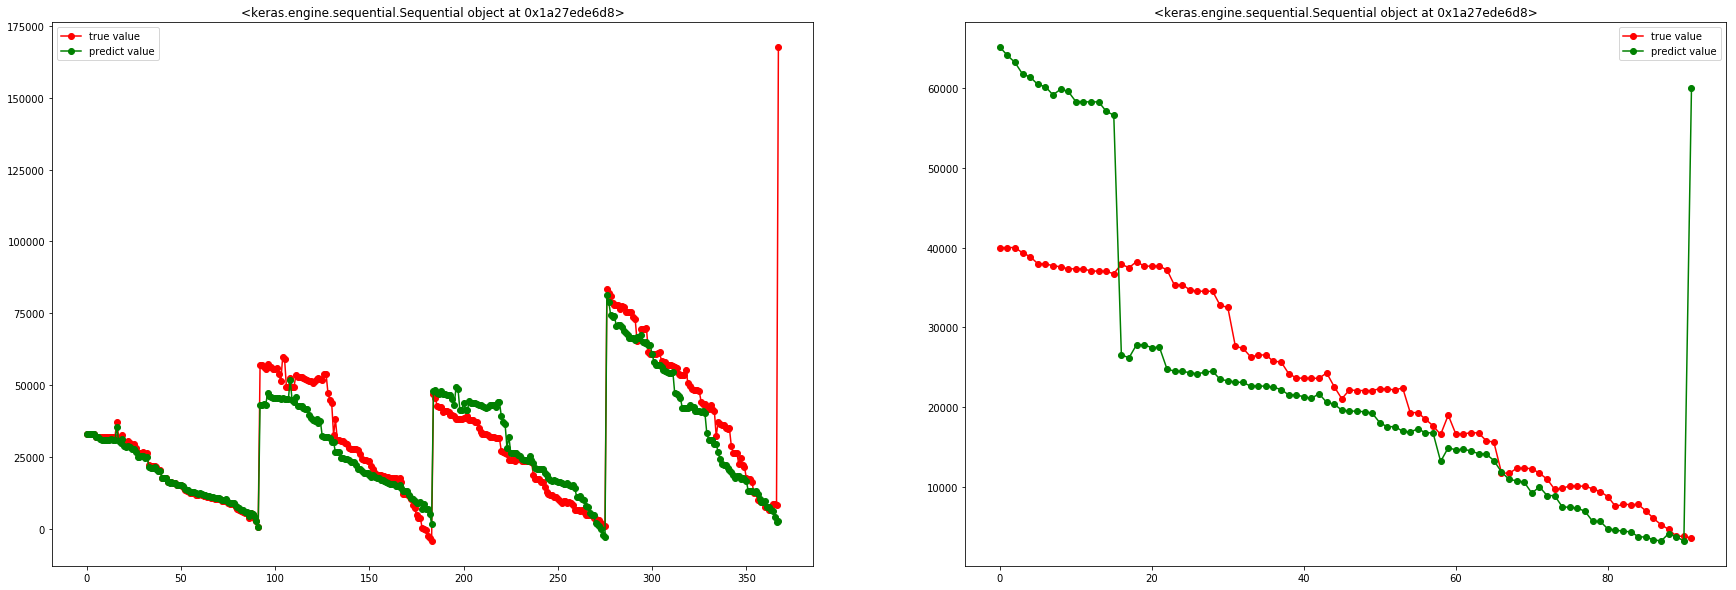

In [27]:
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold
import tensorflow as tf
import keras
from keras.models import Sequential
from keras.layers import Dense,Dropout
from keras.optimizers import RMSprop
from keras import optimizers


batch_size = 50
epochs = 800
input_shape=(3,)
    
kf = KFold(n_splits=4)

KFold(n_splits=4, random_state=None, shuffle=False)

# Building the MLP model
'''
model = Sequential()
model.add(Dense(256,activation='linear',input_shape=input_shape))
#model.add(Dense(128,activation='linear',input_shape=input_shape))
model.add(Dense(128,activation='linear'))
model.add(Dense(64,activation='linear'))
model.add(Dense(32,activation='linear'))
model.add(Dense(1,activation='linear'))
'''

model = Sequential()
model.reset_states() 
model.add(Dense(128,activation='linear',input_shape=input_shape))
#model.add(Dense(128,activation='relu',input_shape=input_shape))
#model.add(Dense(128,activation='linear'))
model.add(Dense(64,activation='linear'))
model.add(Dense(32,activation='linear'))
model.add(Dense(1,activation='linear'))


model.compile(loss='mae', optimizer=optimizers.Adagrad(lr=0.4, epsilon=None, decay=0.05))

model.summary()

for train_index, test_index in kf.split(x_train):
    print("TRAIN:", train_index, "TEST:", test_index)
    
    train_x, test_x = x_train[train_index], x_train[test_index]
    train_y, test_y = y_train[train_index], y_train[test_index]

    train_x = np.reshape(train_x,(len(train_x),3))
    test_x = np.reshape(test_x,(len(test_x),3))
    
    train_x = train_x.astype('float32')
    train_y = train_y.astype('float32')
    test_x = test_x.astype('float32')
    test_y = test_y.astype('float32')
    
    model.fit(train_x,train_y, batch_size=batch_size, epochs=epochs, verbose=0, validation_data=(test_x,test_y))

    score = model.evaluate(test_x,test_y,verbose=0)


predicted_train = model.predict(x_train)
score_train = model.evaluate(x_train,y_train,verbose=0)
mape_train = np.mean(MAPE(np.reshape(y_train,np.shape(predicted_train)), predicted_train))

predicted_test = model.predict(x_test)
score_test = model.evaluate(x_test,y_test,verbose=0)
mape_test = np.mean(MAPE(np.reshape(y_test,np.shape(predicted_test)), predicted_test))

print('mae score_train:',score_train)
print('MAPE_train is: ', mape_train,'%')

print('mae score_test:',score_test)
print('MAPE_test is: ', mape_test,'%')


'''
mape = MAPE(np.reshape(y_test,np.shape(predicted_test)), predicted_test)
LA_tab_2017Q4_2019Q1 = pd.DataFrame(columns=['Region', 'Quarter', 'Week', 'MAPE'])
for i in range(14):
    LA_tab_2017Q4_2019Q1.loc[i] = ['LA', '2019-Q1', i+1, mape[i]]
print('The result tab of model: ', str('MLP'))
print(LA_tab_2017Q4_2019Q1)
'''


plt.figure(figsize=(30,10))

plt.subplot(1,2,1)
plt.plot(np.arange(len(predicted_train)), y_train, 'ro-',label='true value')
plt.plot(np.arange(len(predicted_train)), predicted_train, 'go-',label='predict value')
plt.title(str(model))
plt.legend()

plt.subplot(1,2,2)
plt.plot(np.arange(len(predicted_test)), y_test, 'ro-',label='true value')
plt.plot(np.arange(len(predicted_test)), predicted_test, 'go-',label='predict value')
plt.title(str(model))
plt.legend()

plt.show()

## <font color = red>Case3.</font> I will compute and add new 2 variables into regression model.

In [45]:
AP_ESTIMATED_IN_FC = pd.DataFrame(index=range(92), columns=['2018-Q1', '2018-Q2', '2018-Q3', '2018-Q4', '2019-Q1'])

for i in range(91):
    for j in range(2):
        AP_ESTIMATED_IN_FC.iloc[i+1][j] = AP_ESTIMATED_IN2.iloc[i+1][j] - AP_ESTIMATED_IN2.iloc[i][j]
        
AP_ESTIMATED_IN_FC[AP_ESTIMATED_IN_FC.isnull()==True] = 0



In [46]:
true_GreyRed = pd.concat([AP_GreyRed['2018-Q1'], AP_GreyRed['2018-Q2'], AP_GreyRed['2018-Q3'], AP_GreyRed['2018-Q4'], AP_GreyRed['2019-Q1']]).reset_index(drop=True)

fc1_GreyRed = pd.concat([AP_GreyRed_FC1['2018-Q1'], AP_GreyRed_FC1['2018-Q2'], AP_GreyRed_FC1['2018-Q3'], AP_GreyRed_FC1['2018-Q4'], AP_GreyRed_FC1['2019-Q1']]).reset_index(drop=True)

fc2_GreyRed = pd.concat([AP_GreyRed_FC2['2018-Q1'], AP_GreyRed_FC2['2018-Q2'], AP_GreyRed_FC2['2018-Q3'], AP_GreyRed_FC2['2018-Q4'], AP_GreyRed_FC2['2019-Q1']]).reset_index(drop=True)

fc7_OpenPipe = pd.concat([AP_OpenPipe['2018-Q1'], AP_OpenPipe['2018-Q2'], AP_OpenPipe['2018-Q3'], AP_OpenPipe['2018-Q4'], AP_OpenPipe['2019-Q1']]).reset_index(drop=True)

fc8_OpenPipe = pd.concat([AP_OpenPipe_FC['2018-Q1'], AP_OpenPipe_FC['2018-Q2'], AP_OpenPipe_FC['2018-Q3'], AP_OpenPipe_FC['2018-Q4'], AP_OpenPipe_FC['2019-Q1']]).reset_index(drop=True)

fc5_ESTIMATED_IN = pd.concat([AP_ESTIMATED_IN2['2018-Q1'], AP_ESTIMATED_IN2['2018-Q2'], AP_ESTIMATED_IN2['2018-Q3'], AP_ESTIMATED_IN2['2018-Q4'], AP_ESTIMATED_IN2['2019-Q1']]).reset_index(drop=True)

fc6_ESTIMATED_IN = pd.concat([AP_ESTIMATED_IN_FC['2018-Q1'], AP_ESTIMATED_IN_FC['2018-Q2'], AP_ESTIMATED_IN_FC['2018-Q3'], AP_ESTIMATED_IN_FC['2018-Q4'], AP_ESTIMATED_IN_FC['2019-Q1']]).reset_index(drop=True)

s_train: 1.0
score_train: 0.0
MAPE_train is:  0.0 %
s_test: 0.4552125146727981
score_test: 6552.777305587643
MAPE_test is:  28.89847277051249 %


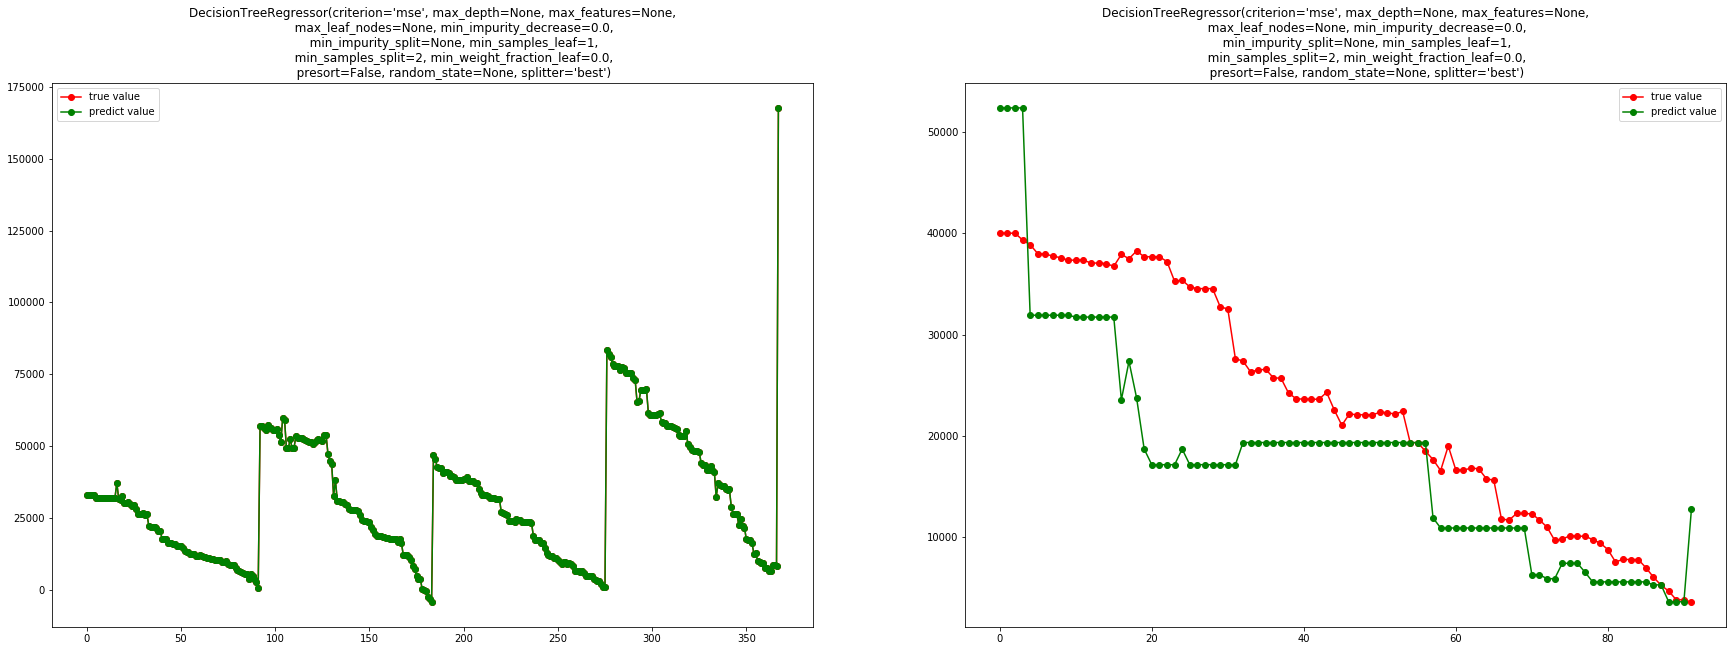

s_train: 0.7729835511586998
score_train: 4822.155742589917
MAPE_train is:  52.54193402267603 %
s_test: 0.33033723593509234
score_test: 7194.425845535782
MAPE_test is:  41.731424782611214 %


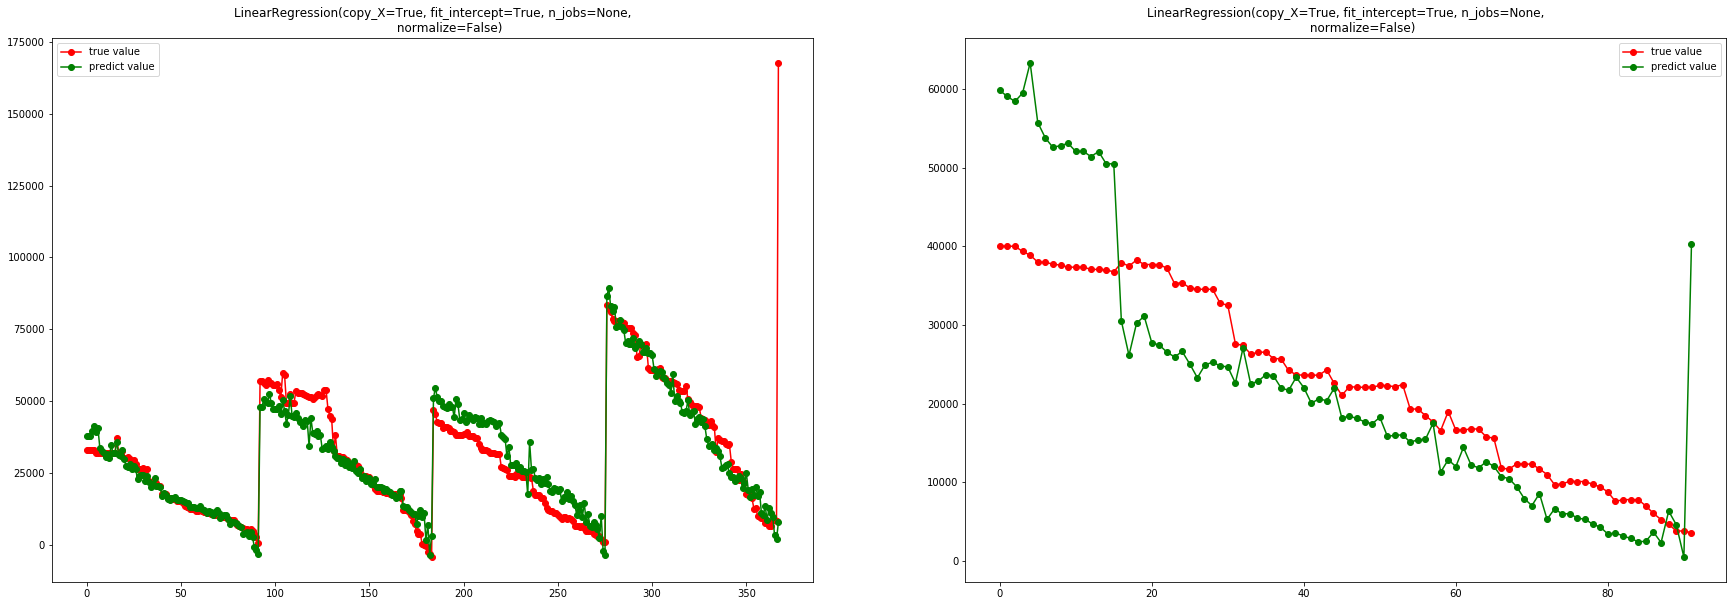

s_train: 0.860517934809567
score_train: 2540.445053711134
MAPE_train is:  23.064533126547552 %
s_test: 0.10337126876388947
score_test: 9436.841206101595
MAPE_test is:  55.59796165678721 %


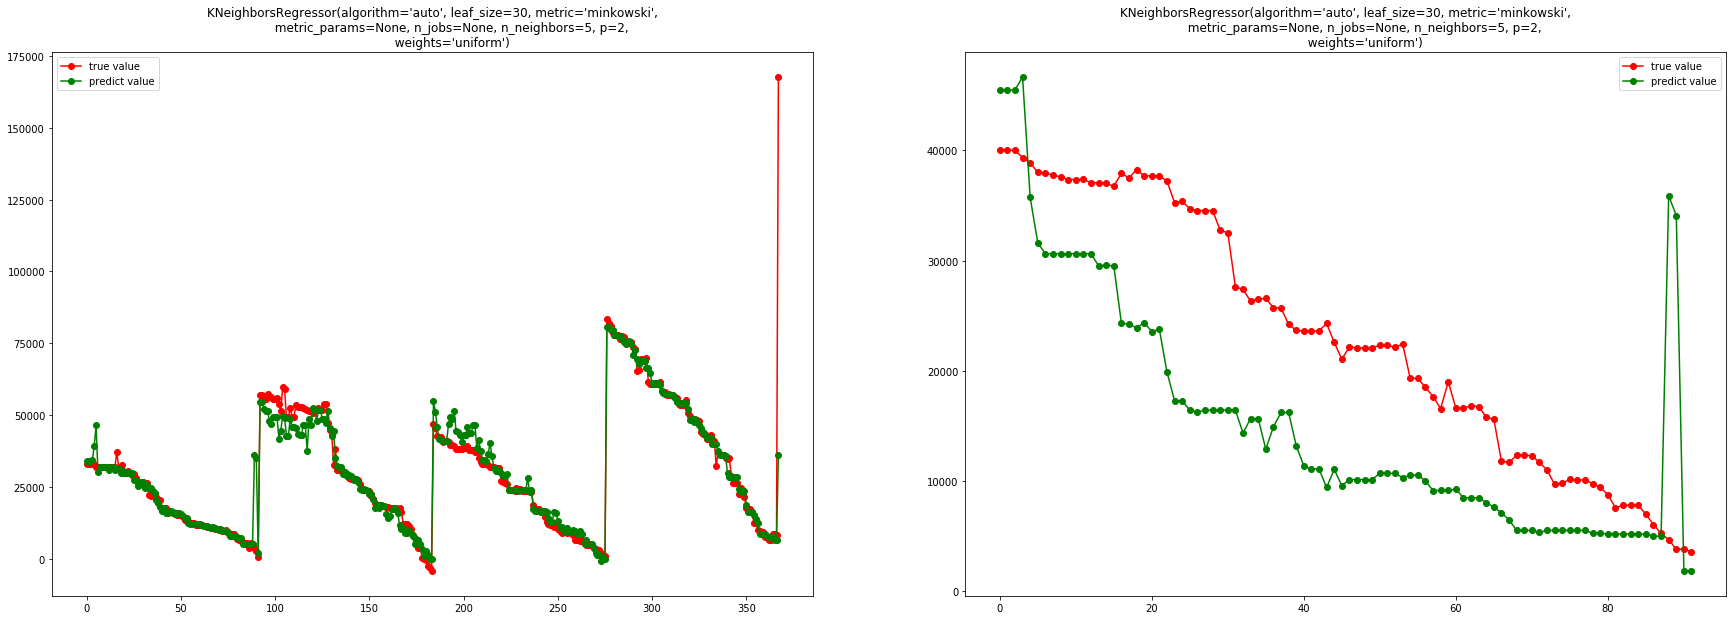

s_train: 0.9243963302210434
score_train: 1010.2971371416405
MAPE_train is:  9.534240681105848 %
s_test: 0.44901249871834226
score_test: 6865.981017675745
MAPE_test is:  31.74125991521401 %


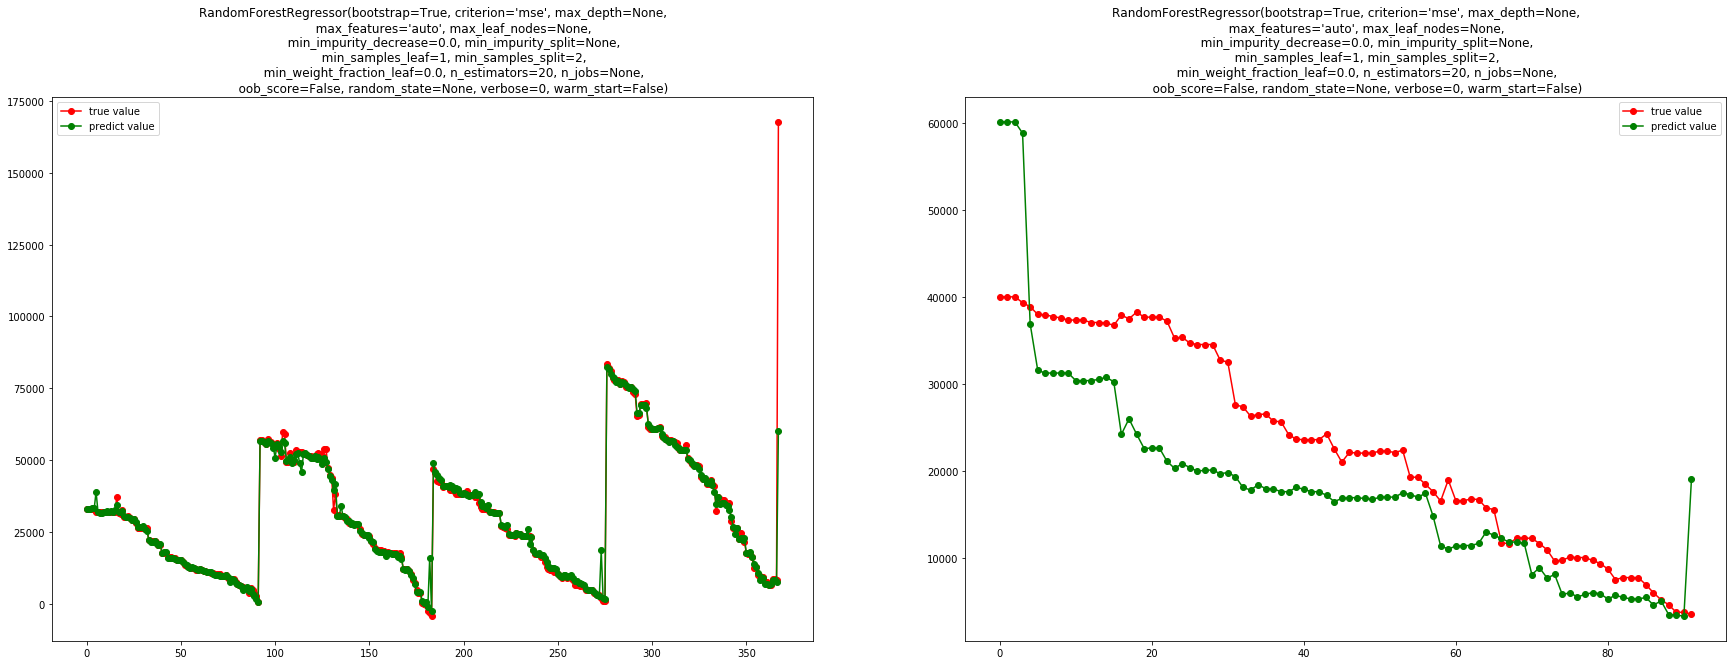

s_train: 0.7729835511586997
score_train: 4822.1557046673715
MAPE_train is:  52.541933959398015 %
s_test: 0.33033726422937815
score_test: 7194.425815935431
MAPE_test is:  41.73142455468418 %


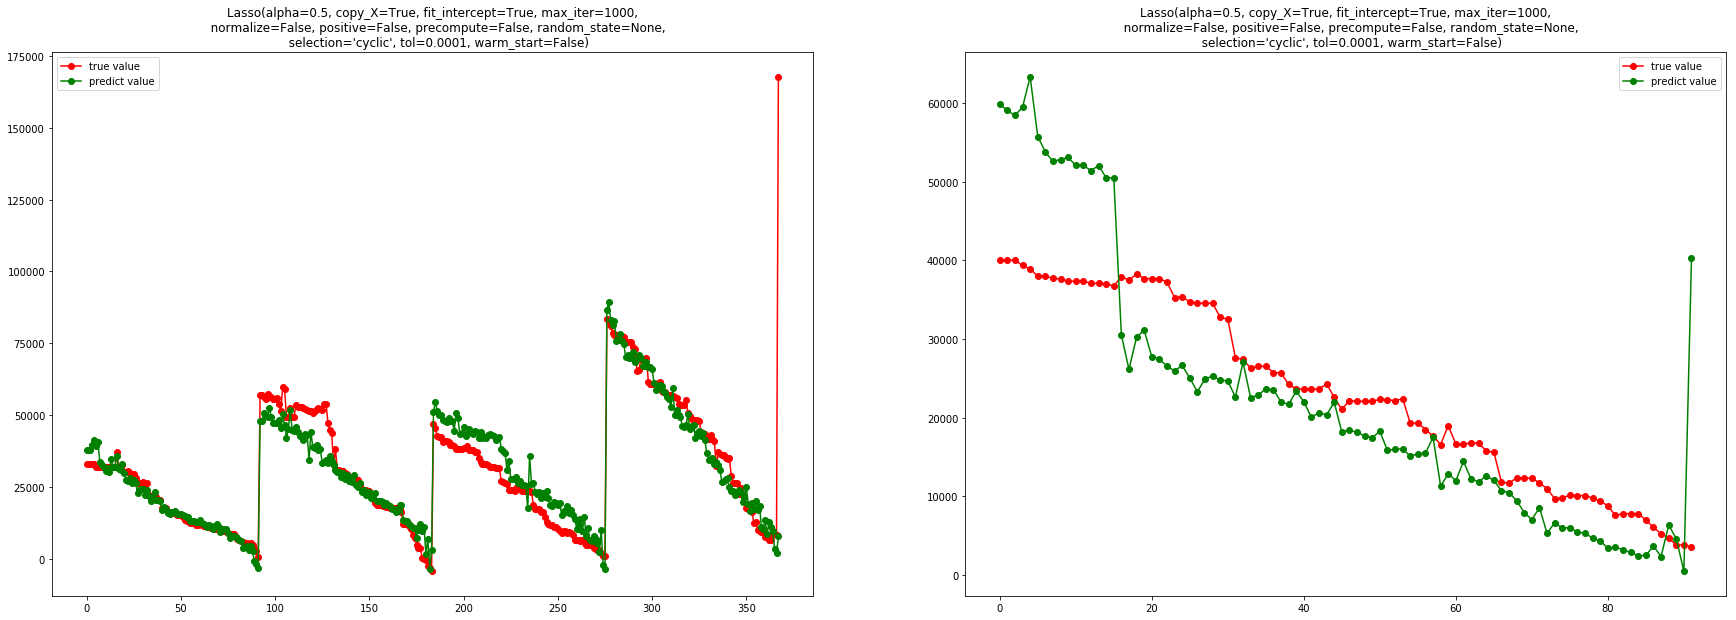

In [47]:
###########1.data preparation part##########
def load_data():

    '''
    x1_train = np.linspace(0,50,500)
    x2_train = np.linspace(-10,10,500)
    data_train = np.array([[x1,x2,f(x1,x2) + (np.random.random(1)-0.5)] for x1,x2 in zip(x1_train, x2_train)])
    
    x1_test = np.linspace(0,50,100)+ 0.5 * np.random.random(100)
    x2_test = np.linspace(-10,10,100) + 0.02 * np.random.random(100)
    data_test = np.array([[x1,x2,f(x1,x2)] for x1,x2 in zip(x1_test, x2_test)])
    '''
    
    #x1_train = fc1_GreyRed[:368]
    x2_train = fc2_GreyRed[:368]
    x5_train = fc5_ESTIMATED_IN[:368]
    x6_train = fc6_ESTIMATED_IN[:368]
    x7_train = fc7_OpenPipe[:368]
    x8_train = fc8_OpenPipe[:368]
    
    
    #x1_test = fc1_GreyRed[368:]
    x2_test = fc2_GreyRed[368:]
    x5_test = fc5_ESTIMATED_IN[368:]
    x6_test = fc6_ESTIMATED_IN[368:]
    x7_test = fc7_OpenPipe[368:]
    x8_test = fc8_OpenPipe[368:]
    
    y_train = true_GreyRed[:368]
    y_test = true_GreyRed[368:]
    
   
    data_train = np.array([[x1,x2,x3,x4,x5,y] for x1,x2,x3,x4,x5,y in zip(x2_train, x5_train, x6_train, x7_train, x8_train, y_train)])
    data_test = np.array([[x1,x2,x3,x4,x5,y] for x1,x2,x3,x4,x5,y in zip(x2_test, x5_test, x6_test, x7_test, x8_test, y_test)])
    
    return data_train, data_test


train, test = load_data()
x_train, y_train = train[:,:5], train[:,5] #数据前两列是x1,x2 第三列是y,这里的y有随机噪声
x_test, y_test = test[:,:5], test[:,5]






###########2.regression part##########
from sklearn.metrics import mean_absolute_error

def try_different_method(model):
    '''    
    model.fit(x_train,y_train)
    #score = model.score(x_test, y_test)
    result = model.predict(x_train)
    plt.figure()
    plt.plot(np.arange(len(result)), y_train,'go-',label='true value')
    plt.plot(np.arange(len(result)),result,'ro-',label='predict value')
    plt.title(str(model))
    plt.legend()
    plt.show()
    '''
    
    #model.fit(x_train,y_train)
    #score = model.score(x_test, y_test)
    #result = model.predict(x_test)
    '''
    predicted = cross_val_predict(model, x_train, y_train, cv=6)

    scores_train = cross_val_score(model, x_train, y_train, cv=6, scoring='neg_mean_absolute_error').mean()
    print('train_neg_mean_absolute_error: ', scores_train)
    scores_pred = mean_absolute_error(y_train, predicted)
    print('pred_mean_absolute_error: ', scores_pred)
    '''
    
    model.fit(x_train,y_train)
    
    predicted_train = model.predict(x_train)
    score_train = mean_absolute_error(predicted_train, y_train)
    s_train = model.score(x_train, y_train)
    mape_train = np.mean(MAPE(y_train, predicted_train))
    
    predicted_test = model.predict(x_test)
    score_test = mean_absolute_error(predicted_test, y_test)
    s_test = model.score(x_test, y_test)
    mape_test = np.mean(MAPE(y_test, predicted_test))
    
    print('s_train:',s_train)
    print('score_train:',score_train)
    print('MAPE_train is: ', mape_train,'%')
    
    print('s_test:',s_test)
    print('score_test:',score_test)
    print('MAPE_test is: ', mape_test,'%')
    
    
    '''
    mape=MAPE(y_test, predicted_test)
    LA_tab_2018Q1_2019Q1 = pd.DataFrame(columns=['Region', 'Quarter', 'Week', 'MAPE'])
    for i in range(14):
        LA_tab_2018Q1_2019Q1.loc[i] = ['LA', '2019-Q1', i+1, mape[i]]
    print('The result tab of model: ', str(model))
    print(LA_tab_2018Q1_2019Q1)
    ''' 
    
    
    plt.figure(figsize=(30,10))
    
    plt.subplot(1,2,1)
    plt.plot(np.arange(len(predicted_train)), y_train,'ro-',label='true value')
    plt.plot(np.arange(len(predicted_train)),predicted_train,'go-',label='predict value')
    plt.title(str(model))
    plt.legend()
    
    plt.subplot(1,2,2)
    plt.plot(np.arange(len(predicted_test)), y_test,'ro-',label='true value')
    plt.plot(np.arange(len(predicted_test)), predicted_test,'go-',label='predict value')
    plt.title(str(model))
    plt.legend()
    
    plt.legend()
    plt.show()

    
    
    
###########4. Implementation ##########
try_different_method(model_DecisionTreeRegressor)
try_different_method(model_LinearRegression)
try_different_method(model_KNeighborsRegressor)
try_different_method(model_RandomForestRegressor)
#try_different_method(model_AdaBoostRegressor)
#try_different_method(model_GradientBoostingRegressor)
#try_different_method(model_SVR)
#try_different_method(model_BaggingRegressor)
#try_different_method(model_ExtraTreeRegressor )
#try_different_method(model_Ridge)
try_different_method(model_lasso)     

### MLP model

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_35 (Dense)             (None, 256)               1536      
_________________________________________________________________
dense_36 (Dense)             (None, 128)               32896     
_________________________________________________________________
dense_37 (Dense)             (None, 64)                8256      
_________________________________________________________________
dense_38 (Dense)             (None, 32)                2080      
_________________________________________________________________
dense_39 (Dense)             (None, 1)                 33        
Total params: 44,801
Trainable params: 44,801
Non-trainable params: 0
_________________________________________________________________
TRAIN: [ 92  93  94  95  96  97  98  99 100 101 102 103 104 105 106 107 108 109
 110 111 112 113 114 115 116 117 118 119 120 121 122 123 1

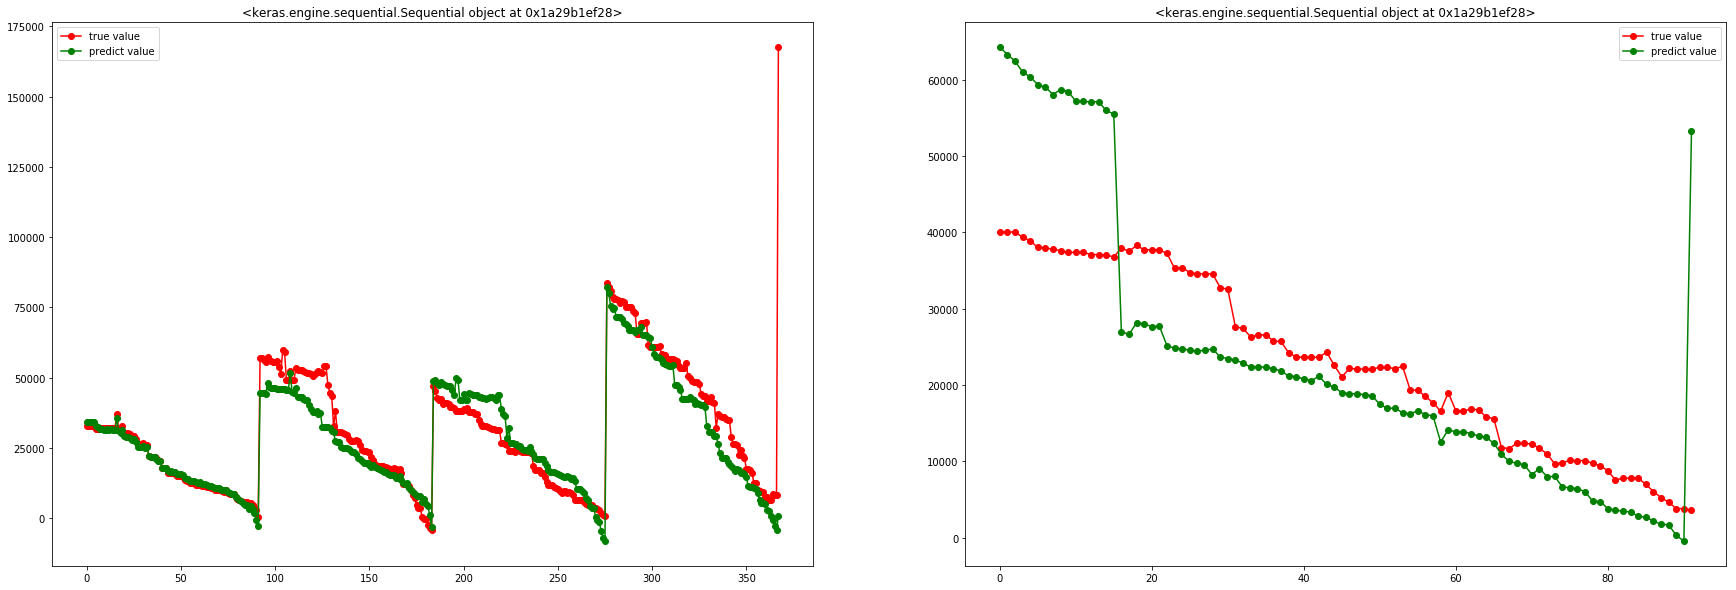

In [49]:
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold
import tensorflow as tf
import keras
from keras.models import Sequential
from keras.layers import Dense,Dropout
from keras.optimizers import RMSprop
from keras import optimizers


batch_size = 50
epochs = 1000
input_shape=(5,)
    
kf = KFold(n_splits=4)

KFold(n_splits=4, random_state=None, shuffle=False)

# Building the MLP model
model = Sequential()
model.reset_states()
model.add(Dense(256,activation='linear',input_shape=input_shape))
#model.add(Dense(128,activation='linear',input_shape=input_shape))
model.add(Dense(128,activation='linear'))
model.add(Dense(64,activation='linear'))
model.add(Dense(32,activation='linear'))
model.add(Dense(1,activation='linear'))

'''
model = Sequential()
model.add(Dense(256,activation='relu',input_shape=input_shape))
#model.add(Dense(128,activation='sigmoid',input_shape=input_shape))
model.add(Dense(128,activation='linear'))
model.add(Dense(64,activation='linear'))
model.add(Dense(32,activation='linear'))
model.add(Dense(1,activation='linear'))
'''

model.compile(loss='mae', optimizer=optimizers.Adagrad(lr=0.16, epsilon=None, decay=0.01))


model.summary()


for train_index, test_index in kf.split(x_train):
    print("TRAIN:", train_index, "TEST:", test_index)
    
    train_x, test_x = x_train[train_index], x_train[test_index]
    train_y, test_y = y_train[train_index], y_train[test_index]

    train_x = np.reshape(train_x,(len(train_x),5))
    test_x = np.reshape(test_x,(len(test_x),5))
    
    train_x = train_x.astype('float32')
    train_y = train_y.astype('float32')
    test_x = test_x.astype('float32')
    test_y = test_y.astype('float32')
    
    model.fit(train_x,train_y, batch_size=batch_size, epochs=epochs, verbose=0, validation_data=(test_x,test_y))

    score = model.evaluate(test_x,test_y,verbose=0)


predicted_train = model.predict(x_train)
score_train = model.evaluate(x_train,y_train,verbose=0)
mape_train = np.mean(MAPE(np.reshape(y_train,np.shape(predicted_train)), predicted_train))

predicted_test = model.predict(x_test)
score_test = model.evaluate(x_test,y_test,verbose=0)
mape_test = np.mean(MAPE(np.reshape(y_test,np.shape(predicted_test)), predicted_test))

print('mae score_train:',score_train)
print('MAPE_train is: ', mape_train,'%')

print('mae score_test:',score_test)
print('MAPE_test is: ', mape_test,'%')


'''
mape = MAPE(np.reshape(y_test,np.shape(predicted_test)), predicted_test)
LA_tab_2018Q1_2019Q1 = pd.DataFrame(columns=['Region', 'Quarter', 'Week', 'MAPE'])
for i in range(14):
    LA_tab_2018Q1_2019Q1.loc[i] = ['LA', '2019-Q1', i+1, mape[i]]
print('The result tab of model: ', str('MLP'))
print(LA_tab_2018Q1_2019Q1)
'''


plt.figure(figsize=(30,10))

plt.subplot(1,2,1)
plt.plot(np.arange(len(predicted_train)), y_train, 'ro-',label='true value')
plt.plot(np.arange(len(predicted_train)), predicted_train, 'go-',label='predict value')
plt.title(str(model))
plt.legend()

plt.subplot(1,2,2)
plt.plot(np.arange(len(predicted_test)), y_test, 'ro-',label='true value')
plt.plot(np.arange(len(predicted_test)), predicted_test, 'go-',label='predict value')
plt.title(str(model))
plt.legend()

plt.show()

## <font color = red>Case4.</font> I will compute and add 2 new more variables, then we have 8 variables at last to build regression model.

In [50]:
AP_GreyRed_FC3 = pd.DataFrame(index=range(92), columns=['2018-Q4','2019-Q1'])

for i in range(92):
    for j in range(2):
        AP_GreyRed_FC3.iloc[i][j] = AP_ESTIMATED_IN2.iloc[i][j+3] * (AP_GreyRed.iloc[i][j]+AP_GreyRed.iloc[i][j+1]+AP_GreyRed.iloc[i][j+2]) / (AP_ESTIMATED_IN2.iloc[i][j]+AP_ESTIMATED_IN2.iloc[i][j+1]+AP_ESTIMATED_IN2.iloc[i][j+2])
        

In [51]:
AP_GreyRed_FC4 = pd.DataFrame(index=range(92), columns=['2018-Q4','2019-Q1'])

for i in range(92):
    for j in range(2):
        AP_GreyRed_FC4.iloc[i][j] = AP_BUDGET.iloc[i][j+3] * (AP_GreyRed.iloc[i][j]+AP_GreyRed.iloc[i][j+1]+AP_GreyRed.iloc[i][j+2]) / (AP_BUDGET.iloc[i][j]+AP_BUDGET.iloc[i][j+1]+AP_BUDGET.iloc[i][j+2])
        

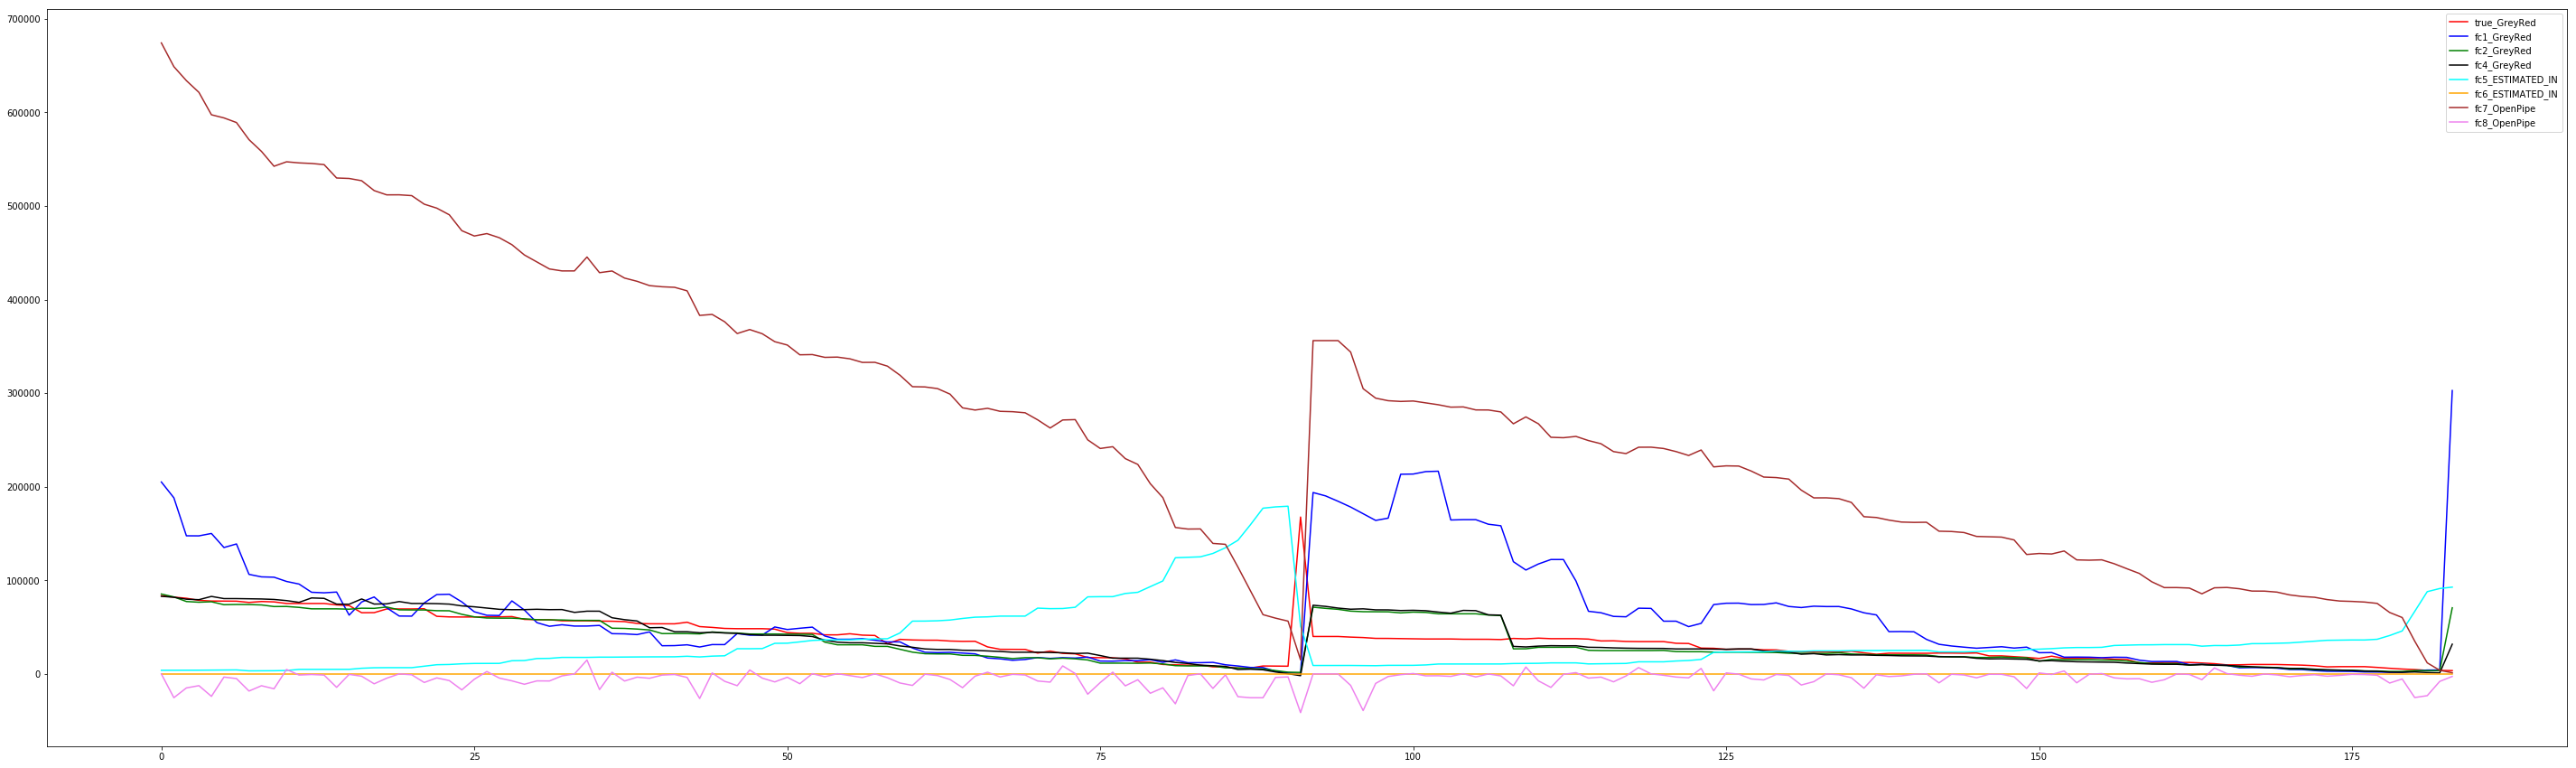

In [62]:
true_GreyRed = pd.concat([AP_GreyRed['2018-Q4'], AP_GreyRed['2019-Q1']]).reset_index(drop=True)

fc1_GreyRed = pd.concat([AP_GreyRed_FC1['2018-Q4'], AP_GreyRed_FC1['2019-Q1']]).reset_index(drop=True)

fc2_GreyRed = pd.concat([AP_GreyRed_FC2['2018-Q4'], AP_GreyRed_FC2['2019-Q1']]).reset_index(drop=True)

fc7_OpenPipe = pd.concat([AP_OpenPipe['2018-Q4'], AP_OpenPipe['2019-Q1']]).reset_index(drop=True)

fc8_OpenPipe = pd.concat([AP_OpenPipe_FC['2018-Q4'], AP_OpenPipe_FC['2019-Q1']]).reset_index(drop=True)

fc5_ESTIMATED_IN = pd.concat([AP_ESTIMATED_IN2['2018-Q4'], AP_ESTIMATED_IN2['2019-Q1']]).reset_index(drop=True)

fc6_ESTIMATED_IN = pd.concat([AP_ESTIMATED_IN_FC['2018-Q4'], AP_ESTIMATED_IN_FC['2019-Q1']]).reset_index(drop=True)

fc3_GreyRed = pd.concat([AP_GreyRed_FC3['2018-Q4'], AP_GreyRed_FC3['2019-Q1']]).reset_index(drop=True)

fc4_GreyRed = pd.concat([AP_GreyRed_FC4['2018-Q4'], AP_GreyRed_FC4['2019-Q1']]).reset_index(drop=True)



fig, ax = plt.subplots(figsize=(50, 15))

red=true_GreyRed
blue=fc1_GreyRed
green=fc2_GreyRed
grey=fc3_GreyRed
black=fc4_GreyRed
aqua=fc5_ESTIMATED_IN
orange=fc6_ESTIMATED_IN
brown=fc7_OpenPipe
violet=fc8_OpenPipe


plt.plot(range(len(red)),red,color='red',label='true_GreyRed')
plt.plot(range(len(blue)),blue,color='blue',label='fc1_GreyRed')
plt.plot(range(len(green)),green,color='green',label='fc2_GreyRed')
#plt.plot(range(len(grey)),grey,color='grey',label='fc3_GreyRed')
plt.plot(range(len(black)),black,color='black',label='fc4_GreyRed')
plt.plot(range(len(aqua)),aqua,color='aqua',label='fc5_ESTIMATED_IN')
plt.plot(range(len(orange)),orange,color='orange',label='fc6_ESTIMATED_IN')
plt.plot(range(len(brown)),brown,color='brown',label='fc7_OpenPipe')
plt.plot(range(len(violet)),violet,color='violet',label='fc8_OpenPipe')

plt.legend()
plt.show()

In [63]:
len(true_GreyRed)

184

s_train: 1.0
score_train: 0.0
MAPE_train is:  0.0 %
s_test: -4.339554734268827
score_test: 25435.99568506612
MAPE_test is:  170.81715560425374 %


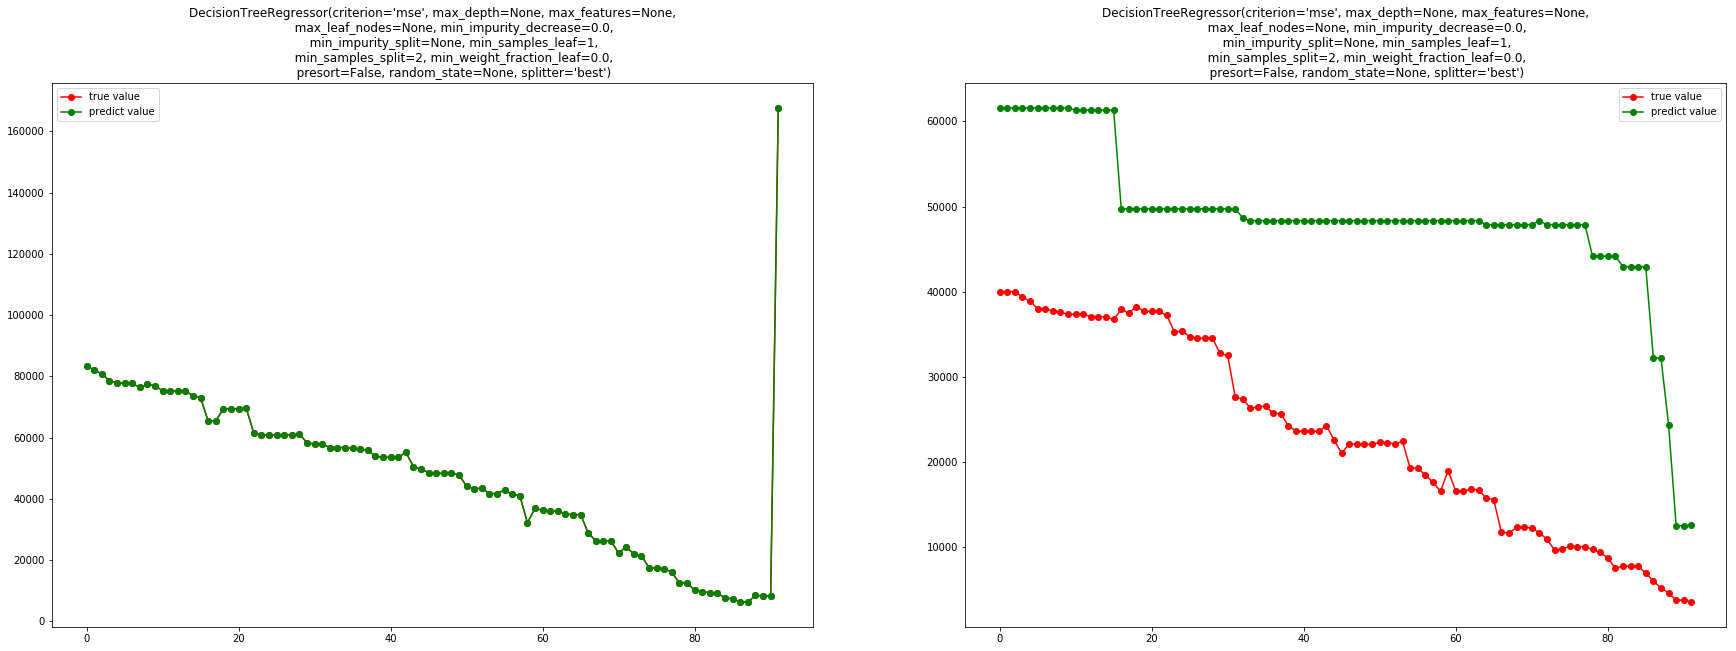

s_train: 0.7743648303930148
score_train: 8066.695789920909
MAPE_train is:  26.99149819685524 %
s_test: -20.156164715884092
score_test: 51286.134993174834
MAPE_test is:  358.5997602185122 %


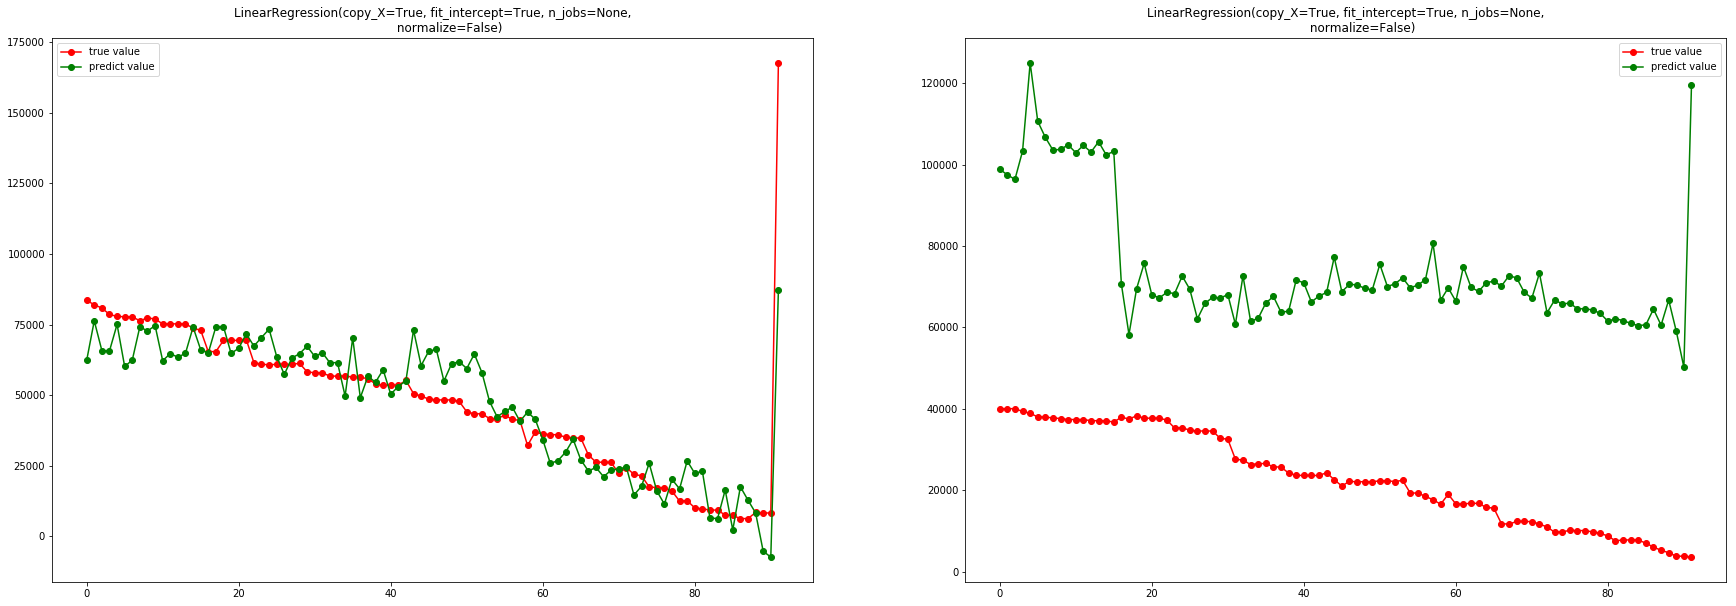

s_train: 0.7299073614224668
score_train: 2831.4525840222504
MAPE_train is:  5.493987624663546 %
s_test: -1.3955805573863072
score_test: 13851.566890552866
MAPE_test is:  141.10317540699603 %


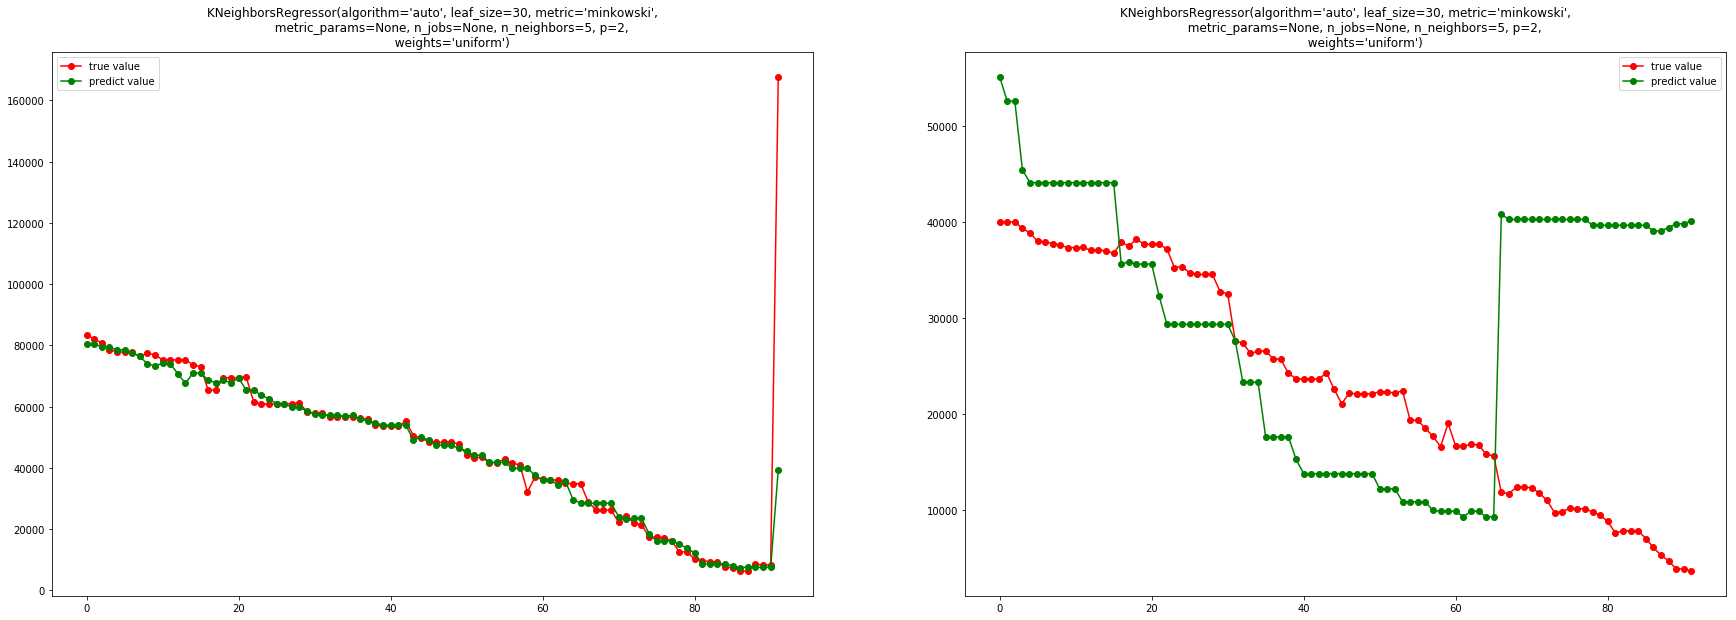

s_train: 0.9635714736519769
score_train: 1136.095536896558
MAPE_train is:  2.293049026587038 %
s_test: -10.069341016797097
score_test: 30633.832499767916
MAPE_test is:  253.9191118571597 %


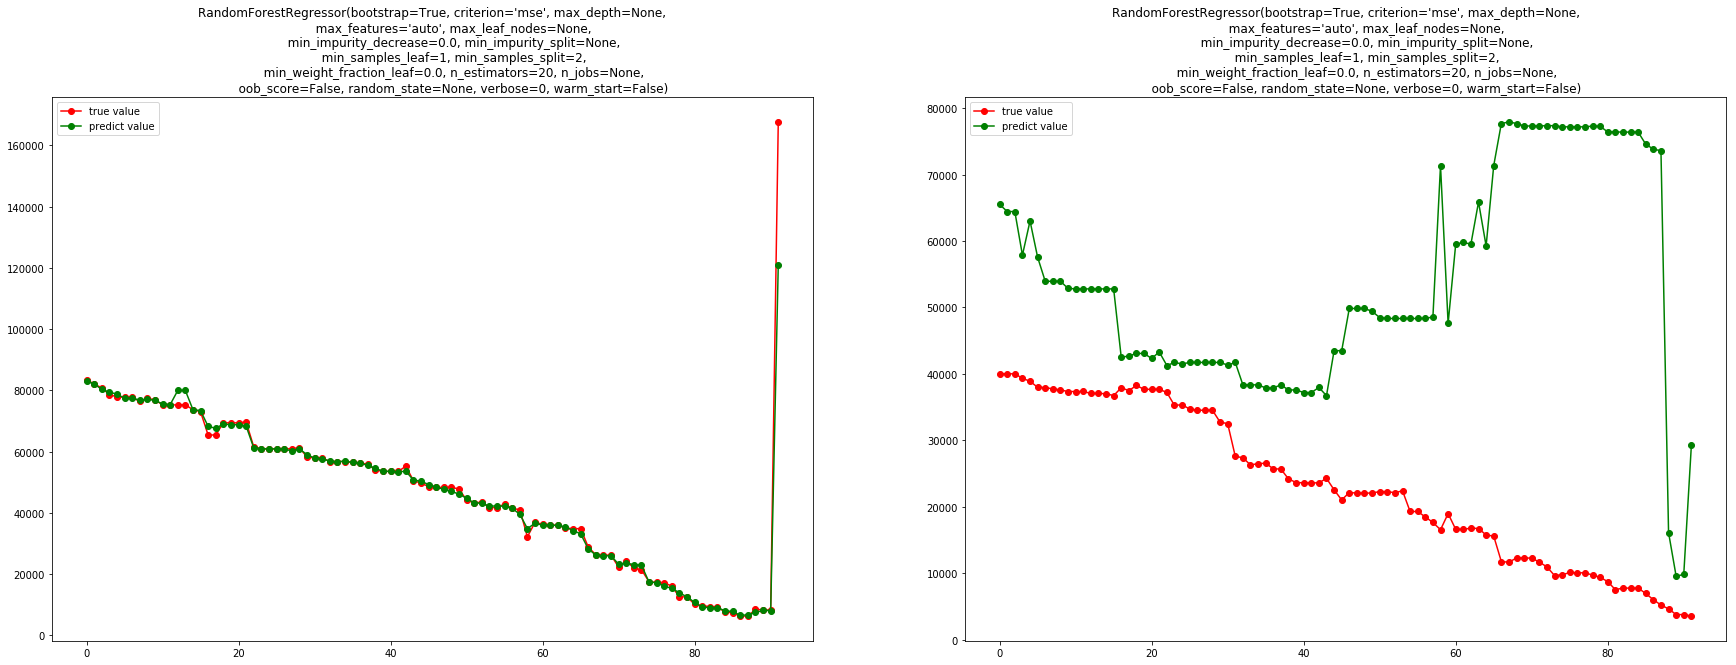

/Users/i513088/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:492: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)


s_train: 0.7743648303930147
score_train: 8066.695748276421
MAPE_train is:  26.99149807562242 %
s_test: -20.156164329709714
score_test: 51286.13450615613
MAPE_test is:  358.5997571051859 %


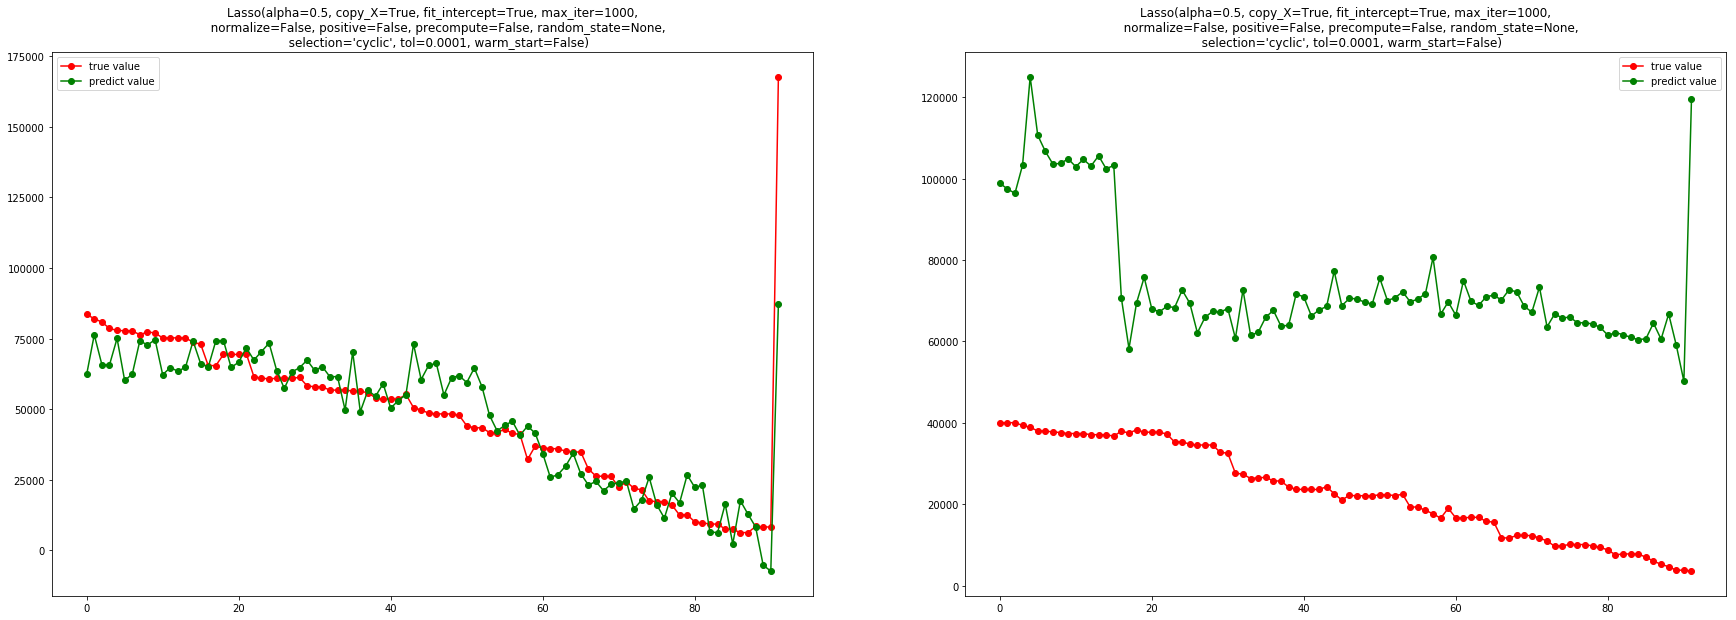

s_train: 0.9711352970699787
score_train: 3331.0362472284733
MAPE_train is:  14.027899004612527 %
s_test: -26.184525122654644
score_test: 52694.909455061614
MAPE_test is:  432.66828239778016 %


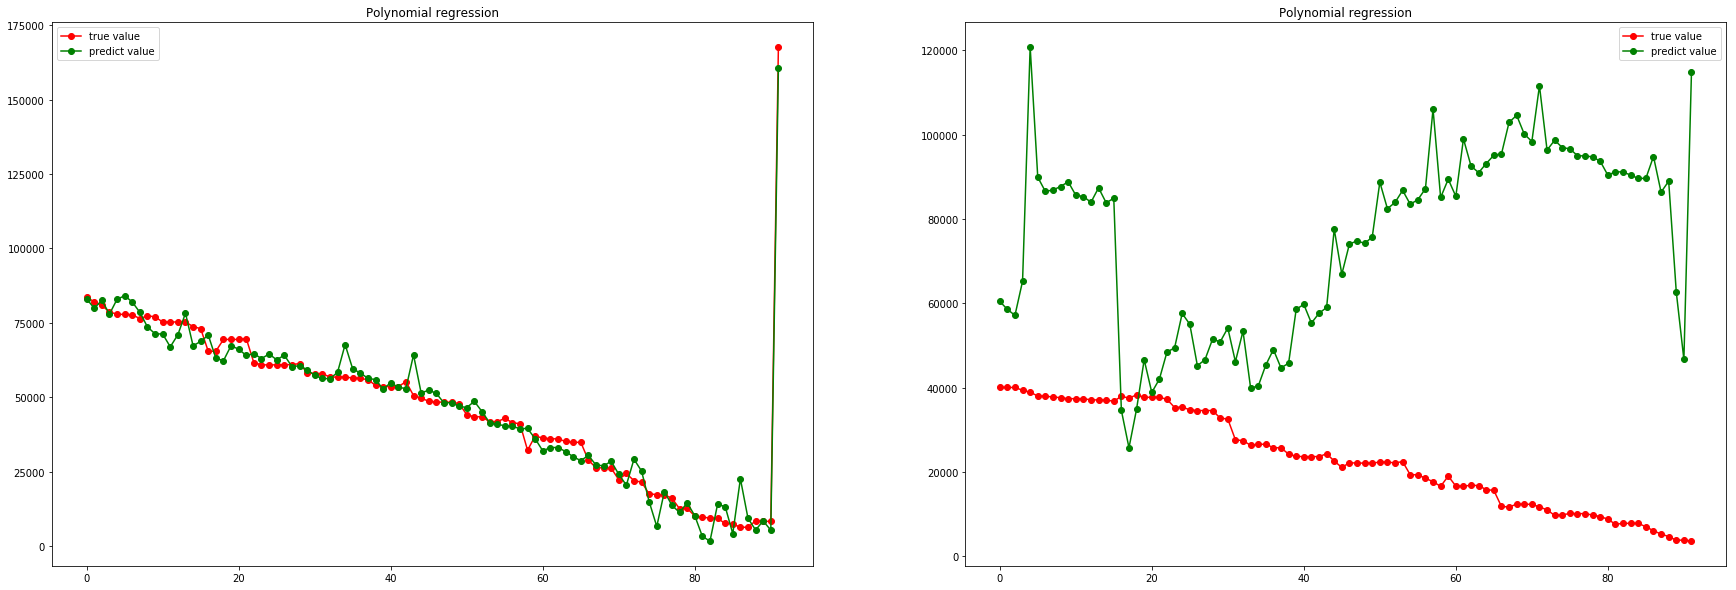

In [80]:
import numpy as np
from sklearn.model_selection import cross_val_predict
from sklearn.model_selection import cross_val_score
from sklearn.metrics import mean_absolute_error

###########1.data preparation part##########
def load_data():

    '''
    x1_train = np.linspace(0,50,500)
    x2_train = np.linspace(-10,10,500)
    data_train = np.array([[x1,x2,f(x1,x2) + (np.random.random(1)-0.5)] for x1,x2 in zip(x1_train, x2_train)])
    
    x1_test = np.linspace(0,50,100)+ 0.5 * np.random.random(100)
    x2_test = np.linspace(-10,10,100) + 0.02 * np.random.random(100)
    data_test = np.array([[x1,x2,f(x1,x2)] for x1,x2 in zip(x1_test, x2_test)])
    '''
    
    #x1_train = fc1_GreyRed[:92]
    x2_train = fc2_GreyRed[:92]
    x3_train = fc3_GreyRed[:92]
    x4_train = fc4_GreyRed[:92]
    x5_train = fc5_ESTIMATED_IN[:92]
    x6_train = fc6_ESTIMATED_IN[:92]
    x7_train = fc7_OpenPipe[:92]
    x8_train = fc8_OpenPipe[:92] 
    
    #x1_test = fc1_GreyRed[92:]
    x2_test = fc2_GreyRed[92:]
    x3_test = fc1_GreyRed[92:]
    x4_test = fc2_GreyRed[92:]
    x5_test = fc5_ESTIMATED_IN[92:]
    x6_test = fc6_ESTIMATED_IN[92:]
    x7_test = fc7_OpenPipe[92:]
    x8_test = fc8_OpenPipe[92:]
    
    y_train = true_GreyRed[:92]
    y_test = true_GreyRed[92:]
    
   
    data_train = np.array([[x1,x2,x3,x4,x5,x6,x7,y] for x1,x2,x3,x4,x5,x6,x7,y in zip(x7_train, x2_train, x3_train, x4_train, x5_train, x6_train, x8_train, y_train)])
    data_test = np.array([[x1,x2,x3,x4,x5,x6,x7,y] for x1,x2,x3,x4,x5,x6,x7,y in zip(x7_test, x2_test, x3_test, x4_test, x5_test, x6_test, x8_test, y_test)])
    
    return data_train, data_test


train, test = load_data()
x_train, y_train = train[:,:7], train[:,7] #数据前两列是x1,x2 第三列是y,这里的y有随机噪声
x_test, y_test = test[:,:7], test[:,7]



###########2.regression part##########
from sklearn.metrics import mean_absolute_error

def try_different_method(model):
    '''    
    model.fit(x_train,y_train)
    #score = model.score(x_test, y_test)
    result = model.predict(x_train)
    plt.figure()
    plt.plot(np.arange(len(result)), y_train,'go-',label='true value')
    plt.plot(np.arange(len(result)),result,'ro-',label='predict value')
    plt.title(str(model))
    plt.legend()
    plt.show()
    '''
    
    #model.fit(x_train,y_train)
    #score = model.score(x_test, y_test)
    #result = model.predict(x_test)
    '''
    predicted = cross_val_predict(model, x_train, y_train, cv=6)

    scores_train = cross_val_score(model, x_train, y_train, cv=6, scoring='neg_mean_absolute_error').mean()
    print('train_neg_mean_absolute_error: ', scores_train)
    scores_pred = mean_absolute_error(y_train, predicted)
    print('pred_mean_absolute_error: ', scores_pred)
    '''
    
    model.fit(x_train,y_train)
    
    predicted_train = model.predict(x_train)
    score_train = mean_absolute_error(predicted_train, y_train)
    s_train = model.score(x_train, y_train)
    mape_train = np.mean(MAPE(y_train, predicted_train))
    
    predicted_test = model.predict(x_test)
    score_test = mean_absolute_error(predicted_test, y_test)
    s_test = model.score(x_test, y_test)
    mape_test = np.mean(MAPE(y_test, predicted_test))
    
    print('s_train:',s_train)
    print('score_train:',score_train)
    print('MAPE_train is: ', mape_train,'%')
    
    print('s_test:',s_test)
    print('score_test:',score_test)
    print('MAPE_test is: ', mape_test,'%')
    
    
    '''
    mape=MAPE(y_test, predicted_test)
    LA_tab_2017Q3_2019Q1 = pd.DataFrame(columns=['Region', 'Quarter', 'Week', 'MAPE'])
    for i in range(14):
        LA_tab_2017Q3_2019Q1.loc[i] = ['LA', '2019-Q1', i+1, mape[i]]
    print('The result tab of model: ', str(model))
    print(LA_tab_2017Q3_2019Q1)
    ''' 
    
    
    plt.figure(figsize=(30,10))
    
    plt.subplot(1,2,1)
    plt.plot(np.arange(len(predicted_train)), y_train,'ro-',label='true value')
    plt.plot(np.arange(len(predicted_train)),predicted_train,'go-',label='predict value')
    plt.title(str(model))
    plt.legend()
    
    plt.subplot(1,2,2)
    plt.plot(np.arange(len(predicted_test)), y_test,'ro-',label='true value')
    plt.plot(np.arange(len(predicted_test)), predicted_test,'go-',label='predict value')
    plt.title(str(model))
    plt.legend()
    
    plt.legend()
    plt.show()

                                  
                                  
###########4. Implementation ##########
try_different_method(model_DecisionTreeRegressor)
try_different_method(model_LinearRegression)
try_different_method(model_KNeighborsRegressor)
try_different_method(model_RandomForestRegressor)
#try_different_method(model_AdaBoostRegressor)
#try_different_method(model_GradientBoostingRegressor)
#try_different_method(model_SVR)
#try_different_method(model_BaggingRegressor)
#try_different_method(model_ExtraTreeRegressor )
#try_different_method(model_Ridge)
try_different_method(model_lasso)     
polyreg()

### MLP model

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_126 (Dense)            (None, 128)               1024      
_________________________________________________________________
dense_127 (Dense)            (None, 128)               16512     
_________________________________________________________________
dense_128 (Dense)            (None, 64)                8256      
_________________________________________________________________
dense_129 (Dense)            (None, 32)                2080      
_________________________________________________________________
dense_130 (Dense)            (None, 1)                 33        
Total params: 27,905
Trainable params: 27,905
Non-trainable params: 0
_________________________________________________________________
TRAIN: [23 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46
 47 48 49 50 51 52 53 54 55 56 57 58 59 60 61 62 63 64 65 

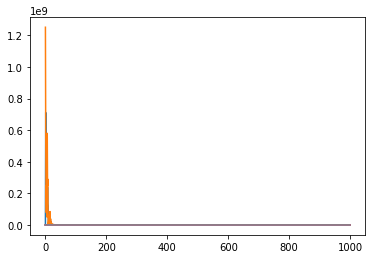

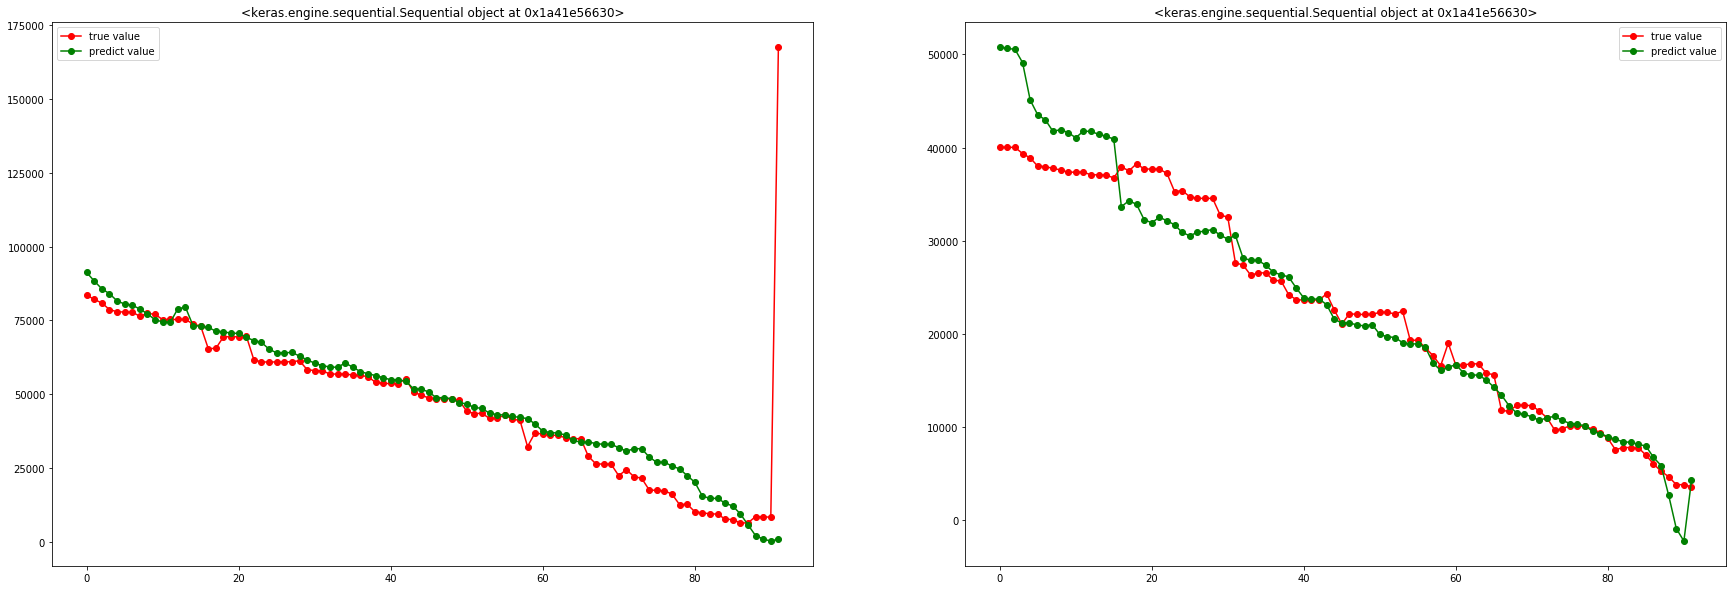

In [81]:
batch_size = 50
epochs = 1000
input_shape=(7,)
    
kf = KFold(n_splits=4)

KFold(n_splits=4, random_state=None)

# Building the MLP model

model = Sequential()
model.reset_states()
model.add(Dense(128,activation='linear',input_shape=input_shape))
#model.add(Dense(128,activation='linear',input_shape=input_shape))
model.add(Dense(128,activation='linear'))
model.add(Dense(64,activation='linear'))
model.add(Dense(32,activation='linear'))
model.add(Dense(1,activation='linear'))

'''
model = Sequential()
model.add(Dense(256,activation='relu',input_shape=input_shape))
#model.add(Dense(128,activation='relu',input_shape=input_shape))
model.add(Dense(128,activation='relu'))
model.add(Dense(64,activation='relu'))
model.add(Dense(32,activation='relu'))
model.add(Dense(1,activation='relu'))
'''

#model.compile(loss='mae', optimizer=optimizers.Adagrad(lr=0.15, epsilon=None, decay=0.01))
model.compile(loss='mae', optimizer=optimizers.Adam(lr=0.15, epsilon=None, decay=0.01))


model.summary()

for train_index, test_index in kf.split(x_train):
    print("TRAIN:", train_index, "TEST:", test_index)
    
    train_x, test_x = x_train[train_index], x_train[test_index]
    train_y, test_y = y_train[train_index], y_train[test_index]

    train_x = np.reshape(train_x,(len(train_x),7))
    test_x = np.reshape(test_x,(len(test_x),7))
    
    train_x = train_x.astype('float32')
    train_y = train_y.astype('float32')
    test_x = test_x.astype('float32')
    test_y = test_y.astype('float32')
    
    history = model.fit(train_x,train_y, batch_size=batch_size, epochs=epochs, verbose=0, validation_data=(test_x,test_y))

    score = model.evaluate(test_x,test_y,verbose=0)
    
    plt.plot(history.history['loss'], label='train')
    plt.plot(history.history['val_loss'], label='test')

    
predicted_train = model.predict(x_train)
score_train = model.evaluate(x_train,y_train,verbose=0)
mape_train = np.mean(MAPE(np.reshape(y_train,np.shape(predicted_train)), predicted_train))

predicted_test = model.predict(x_test)
score_test = model.evaluate(x_test,y_test,verbose=0)
mape_test = np.mean(MAPE(np.reshape(y_test,np.shape(predicted_test)), predicted_test))

print('mae score_train:',score_train)
print('MAPE_train is: ', mape_train,'%')

print('mae score_test:',score_test)
print('MAPE_test is: ', mape_test,'%')


'''
mape = MAPE(np.reshape(y_test,np.shape(predicted_test)), predicted_test)
LA_tab_2017Q4_2019Q1 = pd.DataFrame(columns=['Region', 'Quarter', 'Week', 'MAPE'])
for i in range(14):
    LA_tab_2017Q4_2019Q1.loc[i] = ['LA', '2019-Q1', i+1, mape[i]]
print('The result tab of model: ', str('MLP'))
print(LA_tab_2017Q4_2019Q1)
'''


plt.figure(figsize=(30,10))

plt.subplot(1,2,1)
plt.plot(np.arange(len(predicted_train)), y_train, 'ro-',label='true value')
plt.plot(np.arange(len(predicted_train)), predicted_train, 'go-',label='predict value')
plt.title(str(model))
plt.legend()

plt.subplot(1,2,2)
plt.plot(np.arange(len(predicted_test)), y_test, 'ro-',label='true value')
plt.plot(np.arange(len(predicted_test)), predicted_test, 'go-',label='predict value')
plt.title(str(model))
plt.legend()

plt.show()

In [ ]:
## 6 variables

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_98 (Dense)             (None, 138)               966       
_________________________________________________________________
dense_99 (Dense)             (None, 128)               17792     
_________________________________________________________________
dense_100 (Dense)            (None, 64)                8256      
_________________________________________________________________
dense_101 (Dense)            (None, 32)                2080      
_________________________________________________________________
dense_102 (Dense)            (None, 1)                 33        
Total params: 29,127
Trainable params: 29,127
Non-trainable params: 0
_________________________________________________________________
TRAIN: [23 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46
 47 48 49 50 51 52 53 54 55 56 57 58 59 60 61 62 63 64 65 

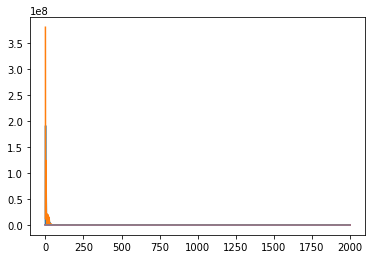

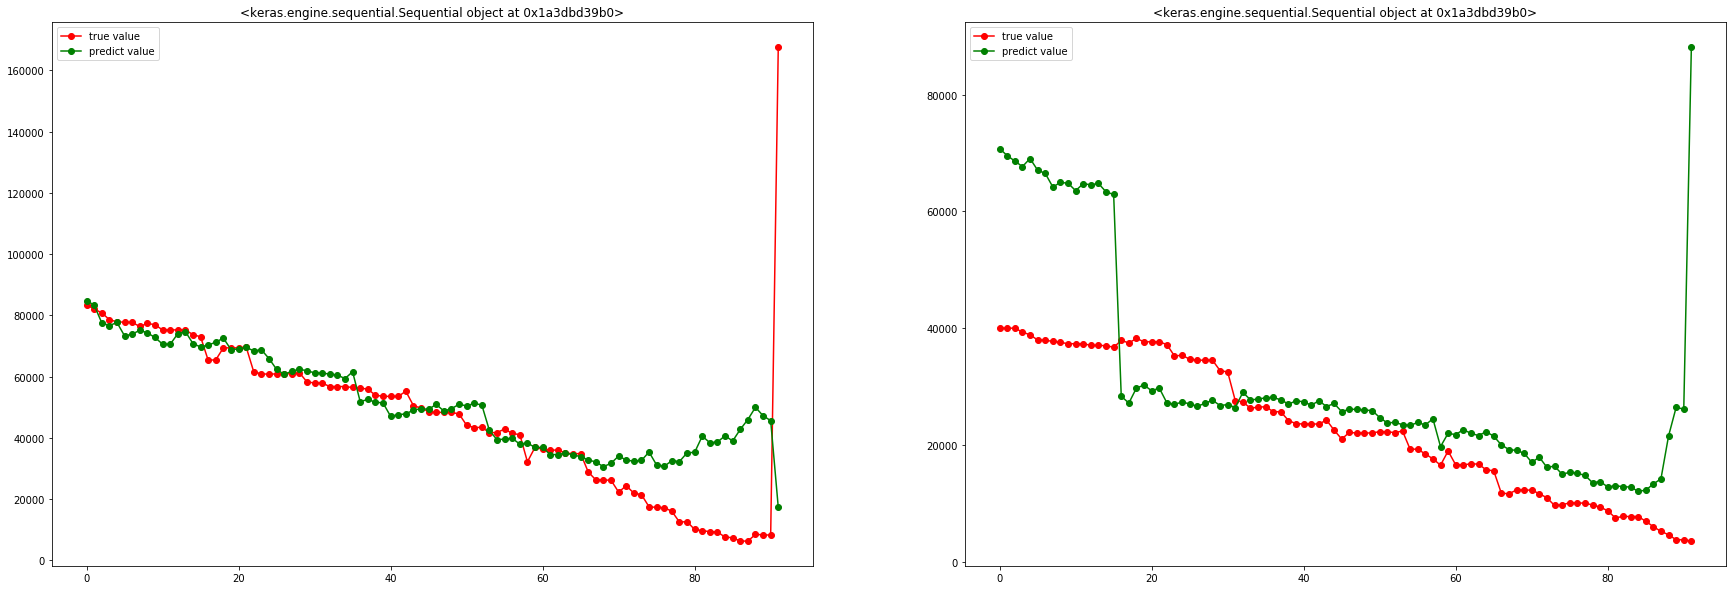

In [73]:
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold
import tensorflow as tf
import keras
from keras.models import Sequential
from keras.layers import Dense,Dropout
from keras.optimizers import RMSprop
from keras import optimizers


batch_size = 50
epochs = 2000
input_shape=(6,)
    
kf = KFold(n_splits=4)

KFold(n_splits=4, random_state=None, shuffle=False)

# Building the MLP model

model = Sequential()
model.reset_states()
model.add(Dense(138,activation='linear',input_shape=input_shape))
#model.add(Dense(128,activation='linear',input_shape=input_shape))
model.add(Dense(128,activation='linear'))
model.add(Dense(64,activation='linear'))
model.add(Dense(32,activation='linear'))
model.add(Dense(1,activation='linear'))

'''
model = Sequential()
model.add(Dense(256,activation='relu',input_shape=input_shape))
#model.add(Dense(128,activation='relu',input_shape=input_shape))
model.add(Dense(128,activation='relu'))
model.add(Dense(64,activation='relu'))
model.add(Dense(32,activation='relu'))
model.add(Dense(1,activation='relu'))
'''

#model.compile(loss='mae', optimizer=optimizers.Adagrad(lr=0.15, epsilon=None, decay=0.01))
model.compile(loss='mae', optimizer=optimizers.Adam(lr=0.15, epsilon=None, decay=0.01))


model.summary()

for train_index, test_index in kf.split(x_train):
    print("TRAIN:", train_index, "TEST:", test_index)
    
    train_x, test_x = x_train[train_index], x_train[test_index]
    train_y, test_y = y_train[train_index], y_train[test_index]

    train_x = np.reshape(train_x,(len(train_x),6))
    test_x = np.reshape(test_x,(len(test_x),6))
    
    train_x = train_x.astype('float32')
    train_y = train_y.astype('float32')
    test_x = test_x.astype('float32')
    test_y = test_y.astype('float32')
    
    history = model.fit(train_x,train_y, batch_size=batch_size, epochs=epochs, verbose=0, validation_data=(test_x,test_y))

    score = model.evaluate(test_x,test_y,verbose=0)
    
    plt.plot(history.history['loss'], label='train')
    plt.plot(history.history['val_loss'], label='test')

    
predicted_train = model.predict(x_train)
score_train = model.evaluate(x_train,y_train,verbose=0)
mape_train = np.mean(MAPE(np.reshape(y_train,np.shape(predicted_train)), predicted_train))

predicted_test = model.predict(x_test)
score_test = model.evaluate(x_test,y_test,verbose=0)
mape_test = np.mean(MAPE(np.reshape(y_test,np.shape(predicted_test)), predicted_test))

print('mae score_train:',score_train)
print('MAPE_train is: ', mape_train,'%')

print('mae score_test:',score_test)
print('MAPE_test is: ', mape_test,'%')


'''
mape = MAPE(np.reshape(y_test,np.shape(predicted_test)), predicted_test)
LA_tab_2017Q4_2019Q1 = pd.DataFrame(columns=['Region', 'Quarter', 'Week', 'MAPE'])
for i in range(14):
    LA_tab_2017Q4_2019Q1.loc[i] = ['LA', '2019-Q1', i+1, mape[i]]
print('The result tab of model: ', str('MLP'))
print(LA_tab_2017Q4_2019Q1)
'''


plt.figure(figsize=(30,10))

plt.subplot(1,2,1)
plt.plot(np.arange(len(predicted_train)), y_train, 'ro-',label='true value')
plt.plot(np.arange(len(predicted_train)), predicted_train, 'go-',label='predict value')
plt.title(str(model))
plt.legend()

plt.subplot(1,2,2)
plt.plot(np.arange(len(predicted_test)), y_test, 'ro-',label='true value')
plt.plot(np.arange(len(predicted_test)), predicted_test, 'go-',label='predict value')
plt.title(str(model))
plt.legend()

plt.show()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_39 (Dense)             (None, 256)               2304      
_________________________________________________________________
dense_40 (Dense)             (None, 128)               32896     
_________________________________________________________________
dense_41 (Dense)             (None, 64)                8256      
_________________________________________________________________
dense_42 (Dense)             (None, 32)                2080      
_________________________________________________________________
dense_43 (Dense)             (None, 1)                 33        
Total params: 45,569
Trainable params: 45,569
Non-trainable params: 0
_________________________________________________________________
TRAIN: [23 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46
 47 48 49 50 51 52 53 54 55 56 57 58 59 60 61 62 63 64 65 

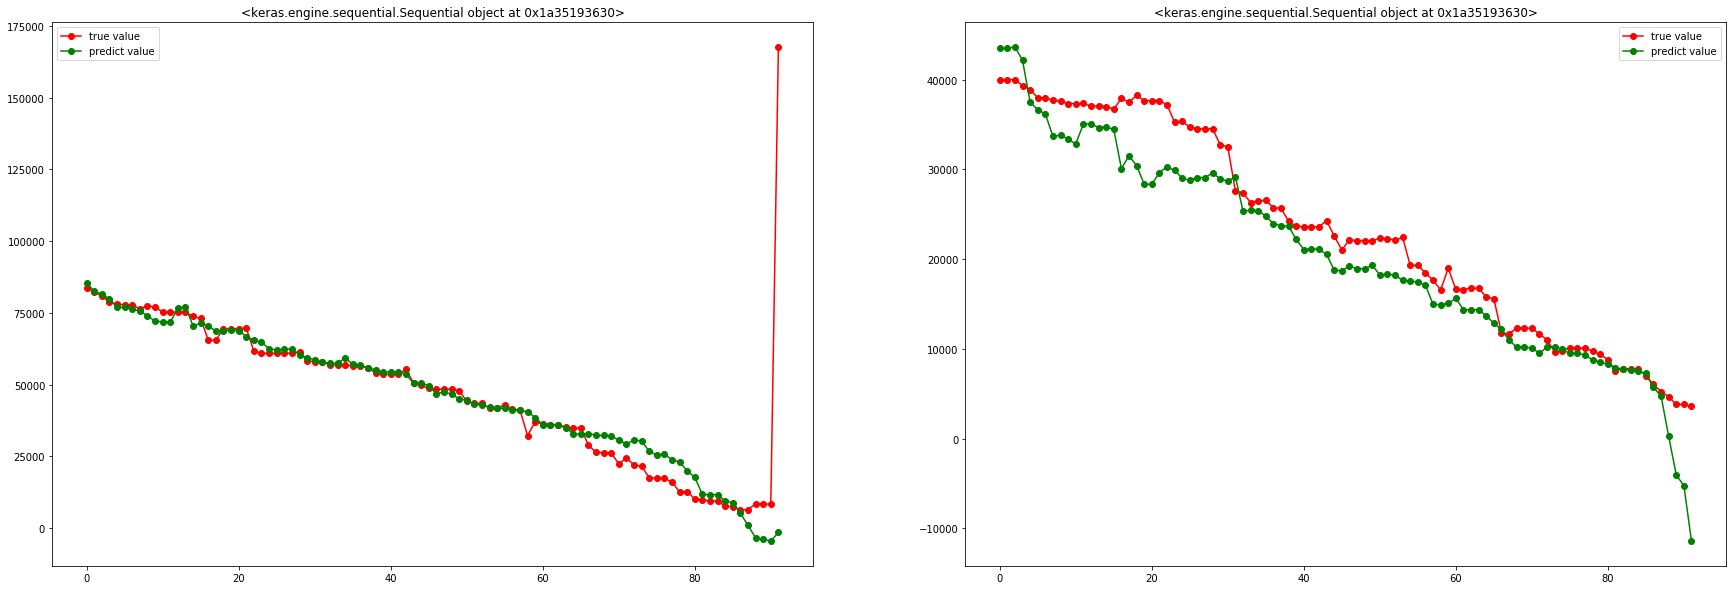

In [59]:
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold
import tensorflow as tf
import keras
from keras.models import Sequential
from keras.layers import Dense,Dropout
from keras.optimizers import RMSprop
from keras import optimizers


batch_size = 50
epochs =800
input_shape=(7,)
    
kf = KFold(n_splits=4)

KFold(n_splits=4, random_state=None, shuffle=False)

# Building the MLP model

model = Sequential()
model.reset_states()
model.add(Dense(256,activation='linear',input_shape=input_shape))
#model.add(Dense(128,activation='linear',input_shape=input_shape))
model.add(Dense(128,activation='linear'))
model.add(Dense(64,activation='linear'))
model.add(Dense(32,activation='linear'))
model.add(Dense(1,activation='linear'))

'''
model = Sequential()
model.add(Dense(256,activation='relu',input_shape=input_shape))
#model.add(Dense(128,activation='relu',input_shape=input_shape))
model.add(Dense(128,activation='relu'))
model.add(Dense(64,activation='relu'))
model.add(Dense(32,activation='relu'))
model.add(Dense(1,activation='relu'))
'''

model.compile(loss='mae', optimizer=optimizers.Adagrad(lr=0.15, epsilon=None, decay=0.01))

model.summary()

for train_index, test_index in kf.split(x_train):
    print("TRAIN:", train_index, "TEST:", test_index)
    
    train_x, test_x = x_train[train_index], x_train[test_index]
    train_y, test_y = y_train[train_index], y_train[test_index]

    train_x = np.reshape(train_x,(len(train_x),7))
    test_x = np.reshape(test_x,(len(test_x),7))
    
    train_x = train_x.astype('float32')
    train_y = train_y.astype('float32')
    test_x = test_x.astype('float32')
    test_y = test_y.astype('float32')
    
    model.fit(train_x,train_y, batch_size=batch_size, epochs=epochs, verbose=0, validation_data=(test_x,test_y))

    score = model.evaluate(test_x,test_y,verbose=0)


predicted_train = model.predict(x_train)
score_train = model.evaluate(x_train,y_train,verbose=0)
mape_train = np.mean(MAPE(np.reshape(y_train,np.shape(predicted_train)), predicted_train))

predicted_test = model.predict(x_test)
score_test = model.evaluate(x_test,y_test,verbose=0)
mape_test = np.mean(MAPE(np.reshape(y_test,np.shape(predicted_test)), predicted_test))

print('mae score_train:',score_train)
print('MAPE_train is: ', mape_train,'%')

print('mae score_test:',score_test)
print('MAPE_test is: ', mape_test,'%')


'''
mape = MAPE(np.reshape(y_test,np.shape(predicted_test)), predicted_test)
LA_tab_2017Q4_2019Q1 = pd.DataFrame(columns=['Region', 'Quarter', 'Week', 'MAPE'])
for i in range(14):
    LA_tab_2017Q4_2019Q1.loc[i] = ['LA', '2019-Q1', i+1, mape[i]]
print('The result tab of model: ', str('MLP'))
print(LA_tab_2017Q4_2019Q1)
'''


plt.figure(figsize=(30,10))

plt.subplot(1,2,1)
plt.plot(np.arange(len(predicted_train)), y_train, 'ro-',label='true value')
plt.plot(np.arange(len(predicted_train)), predicted_train, 'go-',label='predict value')
plt.title(str(model))
plt.legend()

plt.subplot(1,2,2)
plt.plot(np.arange(len(predicted_test)), y_test, 'ro-',label='true value')
plt.plot(np.arange(len(predicted_test)), predicted_test, 'go-',label='predict value')
plt.title(str(model))
plt.legend()

plt.show()